In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import missingno as msno
import seaborn as sns 
import os

In [2]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("fivethirtyeight")
# 이미지가 레이아웃 안으로 들어오도록 함
mpl.rcParams.update({"figure.constrained_layout.use": True})

In [3]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list if 'D2C' in font]
plt.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
DATASET_DIR = '/home/doeun/code/AI/ESTSOFT2024/workspace/dataset/'
dir_name = 'america_big_cities_health_inventory'
file_name = 'BigCitiesHealth.csv'

In [5]:
file_path = os.path.join(DATASET_DIR,dir_name,file_name)
df = pd.read_csv(file_path)

df.info()

/tmp/ipykernel_176709/664991473.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                189979 non-null  object 
 1   metric_cat_label                 189979 non-null  object 
 2   metric_subcat_label              189979 non-null  object 
 3   metric_item_label_subtitle       189979 non-null  object 
 4   metric_cat_item_yaxis_label      189979 non-null  object 
 5   metric_source_desc_label_fn      189979 non-null  object 
 6   metric_source_desc_label_url_fn  189979 non-null  object 
 7   geo_label_city                   189979 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              189979 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            189979 non-null  float64
 12  da

In [6]:
df["metric_label"] = df["metric_subcat_label"]+' | '+df["metric_item_label"] 

In [7]:
df["metric_label"].value_counts()

metric_label
Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: count, Length: 118, dtype: int64

In [8]:
df.columns

Index(['metric_item_label', 'metric_cat_label', 'metric_subcat_label',
       'metric_item_label_subtitle', 'metric_cat_item_yaxis_label',
       'metric_source_desc_label_fn', 'metric_source_desc_label_url_fn',
       'geo_label_city', 'geo_label_state', 'geo_label_citystate',
       'geo_fips_code', 'value', 'date_label', 'geo_label_proxy_or_real',
       'geo_label_proxy_footnote', 'geo_fips_desc', 'date_label_proxy_or_real',
       'date_label_proxy_footnote', 'value_ci_flag_yesno', 'value_95_ci_low',
       'value_95_ci_high', 'value_90_ci_low', 'value_90_ci_high',
       'geo_strata_region', 'geo_strata_poverty', 'geo_strata_Population',
       'geo_strata_PopDensity', 'geo_strata_Segregation', 'strata_race_label',
       'strata_sex_label', 'strata_race_sex_label', 'metric_label'],
      dtype='object')

1. race/sex stratified 된 데이터 체크

In [9]:
list(filter(lambda x: 'strata' in x,df.columns))

['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation',
 'strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']

In [10]:
col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
for col in col_list:
    display(df[col].value_counts())

geo_strata_region
West         66810
South        62748
Midwest      40546
Northeast    18563
Name: count, dtype: int64

geo_strata_poverty
Less poor cities (<18% poor)    141688
Poorest cities (18%+ poor)       46979
Name: count, dtype: int64

geo_strata_Population
Smaller (<1.3 million)    134116
Largest (>1.3 million)     54550
Name: count, dtype: int64

geo_strata_PopDensity
Lower pop. density (<10k per sq mi)      152508
Highest pop. density (>10k per sq mi)     36158
Smaller (<1.3 million)                        1
Name: count, dtype: int64

geo_strata_Segregation
Less Segregated (<50%)      104633
Highly Segregated (50%+)     84034
Name: count, dtype: int64

In [11]:
col_list = ['strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']
for col in col_list:
    display(df[col].value_counts())

strata_race_label
All                              66201
White                            33779
Black                            33286
Hispanic                         28961
Asian/PI                         14895
Asian                             6568
American Indian/Alaska Native     6289
Name: count, dtype: int64

strata_sex_label
Both      123865
Male       35128
Female     30986
Name: count, dtype: int64

strata_race_sex_label
White Male         7579
Black Male         7502
White Female       6814
Black Female       6398
Hispanic Male      6323
Hispanic Female    4886
Asian/PI Male      3892
Asian/PI Female    3268
Name: count, dtype: int64

In [12]:
np.sum(df['strata_sex_label'].isna())

0

In [13]:
cond1 = (df['strata_race_label'] == 'All') & (df['strata_sex_label'] == 'Both')
np.sum(cond1)

46749

In [14]:
cond0 =(df['strata_sex_label'] == 'Both')
display(df.loc[cond0,'strata_race_label'].value_counts())

strata_race_label
All                              46749
White                            19386
Black                            19386
Hispanic                         17752
Asian/PI                          7735
Asian                             6568
American Indian/Alaska Native     6289
Name: count, dtype: int64

In [15]:
cond0 =(df['strata_race_label'] == 'All')
display(df.loc[cond0,'strata_sex_label'].value_counts())

strata_sex_label
Both      46749
Male       9832
Female     9620
Name: count, dtype: int64

In [16]:
cond0 = (df['strata_race_sex_label'].isna())
display(df.loc[cond0,'strata_race_label'].value_counts())
display(df.loc[cond0,'strata_sex_label'].value_counts())

strata_race_label
All                              66201
White                            19386
Black                            19386
Hispanic                         17752
Asian/PI                          7735
Asian                             6568
American Indian/Alaska Native     6289
Name: count, dtype: int64

strata_sex_label
Both      123865
Male        9832
Female      9620
Name: count, dtype: int64

In [17]:
cond0 = (~df['strata_race_sex_label'].isna())
display(df.loc[cond0,['strata_race_sex_label','strata_race_label']].value_counts())
display(df.loc[cond0,['strata_race_sex_label','strata_sex_label']].value_counts())

strata_race_sex_label  strata_race_label
White Male             White                7579
Black Male             Black                7502
White Female           White                6814
Black Female           Black                6398
Hispanic Male          Hispanic             6323
Hispanic Female        Hispanic             4886
Asian/PI Male          Asian/PI             3892
Asian/PI Female        Asian/PI             3268
Name: count, dtype: int64

strata_race_sex_label  strata_sex_label
White Male             Male                7579
Black Male             Male                7502
White Female           Female              6814
Black Female           Female              6398
Hispanic Male          Male                6323
Hispanic Female        Female              4886
Asian/PI Male          Male                3892
Asian/PI Female        Female              3268
Name: count, dtype: int64

- race_sex_label 은 없애기


In [18]:
cond1 = df['strata_race_label'] == 'Asian'
cond2 = df['strata_race_label'] == 'Asian/PI'

race_cond = cond1 | cond2

df_asianpi=df.loc[race_cond,['strata_race_label','metric_label','geo_label_city','date_label']]


In [19]:
df_asianpi['metric_label'].value_counts()

metric_label
Deaths | Premature Death                                  1365
Deaths | Deaths from All Causes                           1083
Cancer | All Cancer Deaths                                1077
Cardiovascular Disease | Cardiovascular Disease Deaths    1069
Cardiovascular Disease | Heart Disease Deaths             1035
                                                          ... 
School Violence | Weapons in School                         36
Dietary Quality | Teen Breakfast                            34
Mental Health | Teen Suicidal Ideation                      34
Physical Activity | Teen Physical Education                 30
Deaths | Maternal Deaths                                    13
Name: count, Length: 62, dtype: int64

In [20]:
cond1 = df_asianpi['strata_race_label'] == 'Asian'
cond2 = df_asianpi['strata_race_label'] == 'Asian/PI'

asain_fetare = set(df_asianpi.loc[cond1,'metric_label'].unique())
asainpi_fetare = set(df_asianpi.loc[cond2,'metric_label'].unique())

asain_fetare.intersection(asainpi_fetare)

set()

asian/ asian pi 통일해도 상관 x

In [21]:
cond1 = df['strata_race_label'] == 'Asian'

df_racesex=df[['strata_race_label','strata_sex_label','metric_label','geo_label_city','date_label','value']]

df_racesex.loc[cond1,'strata_race_label'] = 'Asian/PI'

cond1 = df['strata_race_label'] == 'American Indian/Alaska Native'
df_racesex.loc[cond1,'strata_race_label'] = 'Natives'


In [22]:
np.sum(cond1)

6289

In [23]:
df_racesex['metric_label'].value_counts()

metric_label
Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: count, Length: 118, dtype: int64

- 만약 race/sex가 stratified 된 경우에는 각각 모든 항목이 동시에 있는지 : metric_label / sex, race 로 pivot table 만들면 될 듯
- stratifed 된 record가 있는 label과 아닌 label의 비율 -> pivot_table 만든 것 중에서 all, both 인 것들 확인하면 될 듯
    - 이걸 도시/년도 별로도 확인 하면 좋을 듯

In [24]:
pt1 = pd.pivot_table(df_racesex, index = ['geo_label_city','date_label','metric_label'],values=['strata_race_label','strata_sex_label'],aggfunc=lambda x : list(set(x)))
pt2 = pd.pivot_table(df_racesex, index = ['geo_label_city','date_label','metric_label'],values=['strata_race_label','strata_sex_label'],aggfunc=lambda x : (set(x)))

In [25]:
pt2

strata_race_label  \
geo_label_city date_label metric_label                                                                                     
Austin         2010       Active Transportation | Riding Bike to Work                                              {All}   
                          Active Transportation | Walking to Work                                                  {All}   
                          Air Pollution | Hazardous Air Quality                                                    {All}   
                          Air Pollution | Poor Air Quality                                                         {All}   
                          Births | Low Birthweight                               {White, Black, Asian/PI, Hispanic, All}   
...                                                                                                                  ...   
Washington     2022       Substance Use | Opioid Overdose Deaths                           {Black, Hispanic, All, White}   
                          Transportation | Drives Alone to Work         {White, Black, Natives, Asian/PI, Hispanic, All}   
                          Transportation | Lack of Car                                                             {All}   
                          Transportation | Longer Driving Commute Time                                             {All}   
                          Transportation | Public Transportation Use    {White, Black, Natives, Asian/PI, Hispanic, All}   

                                                                            strata_sex_label  
geo_label_city date_label metric_label                                                        
Austin         2010       Active Transportation | Riding Bike to Work                 {Both}  
                          Active Transportation | Walking to Work                     {Both}  
                          Air Pollution | Hazardous Air Quality                       {Both}  
                          Air Pollution | Poor Air Quality                            {Both}  
                          Births | Low Birthweight                                    {Both}  
...                                                                                      ...  
Washington     2022       Substance Use | Opioid Overdose Deaths        {Male, Both, Female}  
                          Transportation | Drives Alone to Work                       {Both}  
                          Transportation | Lack of Car                                {Both}  
                          Transportation | Longer Driving Commute Time                {Both}  
                          Transportation | Public Transportation Use                  {Both}  

[46749 rows x 2 columns]

In [26]:
pt2.strata_sex_label.value_counts()

strata_sex_label
{Both}                  36915
{Male, Both, Female}     9618
{Male, Both}              214
{Both, Female}              2
Name: count, dtype: int64

In [27]:
cond_onlyM = pt2['strata_sex_label'] == {'Male','Both'}
cond_onlyF = pt2['strata_sex_label'] == {'Female','Both'}

pt2[cond_onlyF]

,,,strata_race_label,strata_sex_label
geo_label_city,date_label,metric_label,,
Boston,2019,Birth Control | Teen Birth Control,"{Hispanic, All}","{Both, Female}"
Detroit,2017,Birth Control | Teen Birth Control,"{Black, All}","{Both, Female}"


In [28]:
pt2[cond_onlyM]

strata_race_label  \
geo_label_city date_label metric_label                                                                       
Austin         2010       Sexually Transmitted Disease | HIV-Related Deaths            {Black, All, White}   
               2014       Sexually Transmitted Disease | HIV-Related Deaths  {Black, Hispanic, All, White}   
               2015       Sexually Transmitted Disease | HIV-Related Deaths            {Black, All, White}   
               2016       Sexually Transmitted Disease | HIV-Related Deaths            {Black, All, White}   
               2017       Sexually Transmitted Disease | HIV-Related Deaths  {Black, Hispanic, All, White}   
...                                                                                                    ...   
Tucson         2018       Sexually Transmitted Disease | HIV-Related Deaths                   {All, White}   
               2019       Sexually Transmitted Disease | HIV-Related Deaths                   {All, White}   
               2020       Sexually Transmitted Disease | HIV-Related Deaths                   {All, White}   
               2021       Sexually Transmitted Disease | HIV-Related Deaths         {Hispanic, All, White}   
               2022       Sexually Transmitted Disease | HIV-Related Deaths                   {All, White}   

                                                                            strata_sex_label  
geo_label_city date_label metric_label                                                        
Austin         2010       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2014       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2015       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2016       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2017       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
...                                                                                      ...  
Tucson         2018       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2019       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2020       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2021       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  
               2022       Sexually Transmitted Disease | HIV-Related Deaths     {Male, Both}  

[214 rows x 2 columns]

In [29]:
temp =(pt2.loc[cond_onlyM].index)
temp = temp.to_numpy()

data = dict()

for ele in temp:
    data[(ele[0],ele[1])] = ele[2]
    
#pd.DataFrame(data)

In [30]:
new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])

new_df.unique()

array(['Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Gun Deaths (Firearms)',
       'Substance Use | Opioid Overdose Deaths'], dtype=object)

- strata_race

In [31]:
pt2.strata_race_label.value_counts()

strata_race_label
{All}                                               26742
{White, Black, Asian/PI, Hispanic, All}              7520
{White, Black, Natives, Asian/PI, Hispanic, All}     6282
{Black, Hispanic, All, White}                        3140
{Black, All, White}                                  1691
{Black, All}                                          249
{Black, All, White, Asian/PI}                         233
{Black, Hispanic, All}                                232
{Hispanic, All, White}                                222
{Hispanic, All, White, Asian/PI}                      209
{Hispanic, All}                                        90
{All, White}                                           73
{Black, Hispanic, All, Asian/PI}                       32
{Hispanic, All, Asian/PI}                              18
{All, White, Asian/PI}                                  9
{White, Black, Natives, Hispanic, All}                  7
Name: count, dtype: int64

In [32]:
etc_key = list(pt2.strata_race_label.value_counts().keys())[5:]

In [33]:
for key in etc_key[:4]:
    cond_onlyM = pt2['strata_race_label'] == key
    temp =(pt2.loc[cond_onlyM].index).to_numpy()
    data = dict()
    for ele in temp:
        data[(ele[0],ele[1])] = ele[2]

    new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])
    print('-'*30)
    print(key)
    display(new_df.unique())

------------------------------
{'Black', 'All'}


array(['Deaths | Maternal Deaths', 'Substance Use | Teen Smoking',
       'Substance Use | Teen Alcohol',
       'Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Police Killings', 'Crime Incidents | Homicides',
       'Birth Control | Teen Birth Control'], dtype=object)

------------------------------
{'Black', 'All', 'White', 'Asian/PI'}


array(['Cancer | All Cancer Deaths', 'Cancer | Lung Cancer Deaths',
       'Cancer | Breast Cancer Deaths',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Colorectal Cancer Deaths', 'Mental Health | Suicide',
       'Diabetes and Obesity | Diabetes Deaths',
       'Deaths | Deaths from All Causes', 'Deaths | Injury Deaths',
       'Cancer | Prostate Cancer Deaths',
       'Life Expectancy at Birth | Life Expectancy',
       'Deaths | Motor Vehicle Deaths',
       'Substance Use | Drug Overdose Deaths',
       'Substance Use | Opioid Overdose Deaths',
       'Respiratory Infection | COVID-19 Deaths'], dtype=object)

------------------------------
{'Black', 'Hispanic', 'All'}


array(['Deaths | Maternal Deaths', 'Crime Incidents | Homicides',
       'Substance Use | Teen Smoking', 'Deaths | Gun Deaths (Firearms)',
       'Substance Use | Teen Alcohol', 'Deaths | Police Killings',
       'Birth Control | Teen Birth Control', 'Births | Teen Births',
       'Deaths | Motor Vehicle Deaths'], dtype=object)

------------------------------
{'Hispanic', 'All', 'White'}


array(['Substance Use | Opioid Overdose Deaths',
       'Cancer | Prostate Cancer Deaths',
       'Sexually Transmitted Disease | HIV-Related Deaths',
       'Substance Use | Teen Smoking', 'Deaths | Maternal Deaths',
       'Deaths | Motor Vehicle Deaths', 'Deaths | Police Killings',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Colorectal Cancer Deaths'], dtype=object)

In [34]:
for key in etc_key[4:]:
    cond_onlyM = pt2['strata_race_label'] == key
    temp =(pt2.loc[cond_onlyM].index).to_numpy()
    data = dict()
    for ele in temp:
        data[(ele[0],ele[1])] = ele[2]

    new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])
    print('-'*30)
    print(key)
    display(new_df.unique())

------------------------------
{'Hispanic', 'All', 'White', 'Asian/PI'}


array(['Mental Health | Suicide', 'Substance Use | Teen Smoking',
       'School Violence | Weapons in School',
       'Substance Use | Teen Alcohol',
       'Sexually Transmitted Disease | HIV/AIDS Prevalence',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Colorectal Cancer Deaths'], dtype=object)

------------------------------
{'Hispanic', 'All'}


array(['Birth Control | Teen Birth Control',
       'Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Maternal Deaths', 'Substance Use | Teen Smoking'],
      dtype=object)

------------------------------
{'All', 'White'}


array(['Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Police Killings',
       'Substance Use | Opioid Overdose Deaths',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Breast Cancer Deaths', 'Deaths | Motor Vehicle Deaths',
       'Birth Control | Teen Birth Control'], dtype=object)

------------------------------
{'Black', 'Hispanic', 'All', 'Asian/PI'}


array(['Crime Incidents | Homicides', 'Deaths | Infant Deaths',
       'Substance Use | Teen Smoking', 'Births | Teen Births'],
      dtype=object)

------------------------------
{'Hispanic', 'All', 'Asian/PI'}


array(['Substance Use | Teen Smoking',
       'Diabetes and Obesity | Teen Obesity'], dtype=object)

------------------------------
{'All', 'White', 'Asian/PI'}


array(['Mental Health | Suicide',
       'Respiratory Infection | Pneumonia or Influenza Deaths'],
      dtype=object)

------------------------------
{'White', 'Black', 'Natives', 'Hispanic', 'All'}


array(['Sexually Transmitted Disease | HIV/AIDS Prevalence'], dtype=object)

In [35]:

def check_func(x):
    if len(x.intersection(set(['White','Black'])))==2 : return False
    else : return True


etc_key2 = list(filter(check_func,pt2.strata_race_label.value_counts().keys()))

etc_key2 = etc_key2[1:]

In [36]:
rslt = set()

for key in etc_key2:
    cond_onlyM = pt2['strata_race_label'] == key
    temp =(pt2.loc[cond_onlyM].index).to_numpy()
    data = dict()
    for ele in temp:
        data[(ele[0],ele[1])] = ele[2]

    new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])
    rslt=rslt.union(set(new_df.unique()))
    
rslt

{'Birth Control | Teen Birth Control',
 'Births | Teen Births',
 'Cancer | Breast Cancer Deaths',
 'Cancer | Colorectal Cancer Deaths',
 'Cancer | Prostate Cancer Deaths',
 'Crime Incidents | Homicides',
 'Deaths | Gun Deaths (Firearms)',
 'Deaths | Infant Deaths',
 'Deaths | Maternal Deaths',
 'Deaths | Motor Vehicle Deaths',
 'Deaths | Police Killings',
 'Diabetes and Obesity | Teen Obesity',
 'Mental Health | Suicide',
 'Respiratory Infection | Pneumonia or Influenza Deaths',
 'School Violence | Weapons in School',
 'Sexually Transmitted Disease | HIV-Related Deaths',
 'Sexually Transmitted Disease | HIV/AIDS Prevalence',
 'Substance Use | Opioid Overdose Deaths',
 'Substance Use | Teen Alcohol',
 'Substance Use | Teen Smoking'}

- df_racesex 에 대해서 각 label 별로 비율

In [37]:
def count_key_opt(data:pd.DataFrame,key,opt):
    rslt = dict()
    labels = data[key].unique()
    form = data[opt].value_counts().sort_values(ascending=False)
    form.iloc[:] = 0

    for feat in labels:
        cond = data[key]==feat
        val = form.copy()
        temp = data.loc[cond,opt].value_counts()
        val.loc[temp.index] = temp
        rslt[feat] = val

    return pd.DataFrame(rslt).T

- 되는대로 하다보니 함수를 만들게 됐는데, pivot table로 더 간단하게 할 수 있을 것 같아요.

    pivot table를 그 때는 전혀 생각을 못 했는데 수정해주실 수 있는 분 있으면 감사할 것 같아요

In [38]:
df_racesex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   strata_race_label  189979 non-null  object 
 1   strata_sex_label   189979 non-null  object 
 2   metric_label       189979 non-null  object 
 3   geo_label_city     189979 non-null  object 
 4   date_label         189979 non-null  int64  
 5   value              189979 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.7+ MB


In [39]:
import itertools

keys = ['metric_label','geo_label_city']
opts = ['strata_race_label','strata_sex_label']

rslt_dict ={
    (key,opt) : count_key_opt(df_racesex,key,opt)
    for key,opt in itertools.product(keys,opts)
}

- label 별 race stratified 비율

In [40]:
temp = rslt_dict['metric_label','strata_race_label']
stratified_label_race = temp['All'] != temp.sum(axis=1)
stratified_label_race

Cancer | All Cancer Deaths                                               True
Cancer | Breast Cancer Deaths                                            True
Cancer | Lung Cancer Deaths                                              True
Cancer | Colorectal Cancer Deaths                                        True
Cancer | Prostate Cancer Deaths                                          True
                                                                        ...  
Housing | Vacant Housing and Homelessness                               False
Racial Segregation Indices | Racial Segregation, White and Non-White    False
Racial Segregation Indices | Racial Segregation, White and Black        False
Racial Segregation Indices | Racial Segregation, White and Asian        False
Racial Segregation Indices | Racial Segregation, White and Hispanic     False
Length: 118, dtype: bool

In [41]:
temp = rslt_dict['metric_label','strata_sex_label']
stratified_label_sex = temp['Both'] != temp.sum(axis=1)
stratified_label_sex

Cancer | All Cancer Deaths                                               True
Cancer | Breast Cancer Deaths                                           False
Cancer | Lung Cancer Deaths                                              True
Cancer | Colorectal Cancer Deaths                                        True
Cancer | Prostate Cancer Deaths                                         False
                                                                        ...  
Housing | Vacant Housing and Homelessness                               False
Racial Segregation Indices | Racial Segregation, White and Non-White    False
Racial Segregation Indices | Racial Segregation, White and Black        False
Racial Segregation Indices | Racial Segregation, White and Asian        False
Racial Segregation Indices | Racial Segregation, White and Hispanic     False
Length: 118, dtype: bool

In [42]:
import re

def choose_split_point(word_len,space,ths):
    # 윗 줄에 space 만큼 공백이 있고, 한 줄의 길이가 ths로 제한 되어있을 때
    # 어떤 지점에서 단어를 끊어줄지 정하기
    # |-------ths-------|
    # |-space-|---------|-space-|------| : word
    #         |-------ths-------|
    print(word_len,space,ths)
    if word_len < ths + space :
        if abs(word_len/2 -ths) <= abs(word_len/2-space) :
            return word_len-ths
        else :
            return word_len - space if word_len < 2 * space else space
    else :
        return ths if word_len - (ths + space) < 0.3 * ths else space

def minimize_seq_idx_np(domain:np.array,func):
    vfunc = np.vectorize(func)
    temp = np.argsort(vfunc(domain))
    return temp[0]

def modify_strlen_ths(last,new,ths=16):
    front = len(last)
    space = ths - (1+front)
    if len(new) < space :
        rslt = [last + ' ' + new]
    else :
        if len(new) < ths:
            rslt = [last, new]
        else:
            cut = choose_split_point(len(new),space-1,ths-1)
            new_h, new_e = new[:cut]+'-', new[cut:]
            if cut < ths-1 :
                rslt = modify_strlen_ths(last+' '+new_h,new_e)
            else :
                rslt = [last] + modify_strlen_ths(new_h,new_e) 
    return rslt

def str_cutter(sentnc, ths = 16):
    words= sentnc.split(' ')
    rslt, pnt = [''], 0
    while pnt < len(words):
        last = '' if len(rslt)==0 else rslt[-1]
        next_ele = modify_strlen_ths(last,words[pnt],ths)
        rslt = rslt[:-1] + next_ele
        pnt += 1
    return '\n'.join(rslt)[1:]
#알고리즘 때문에 맨 앞에 빈칸 하나 들어가게 되는 이슈 있음

print(str_cutter('Racial Segregation Indices | Racial Segregation, White and Hispanic', 13))



Racial
Segregation
Indices |
Racial
Segregation,
White and
Hispanic


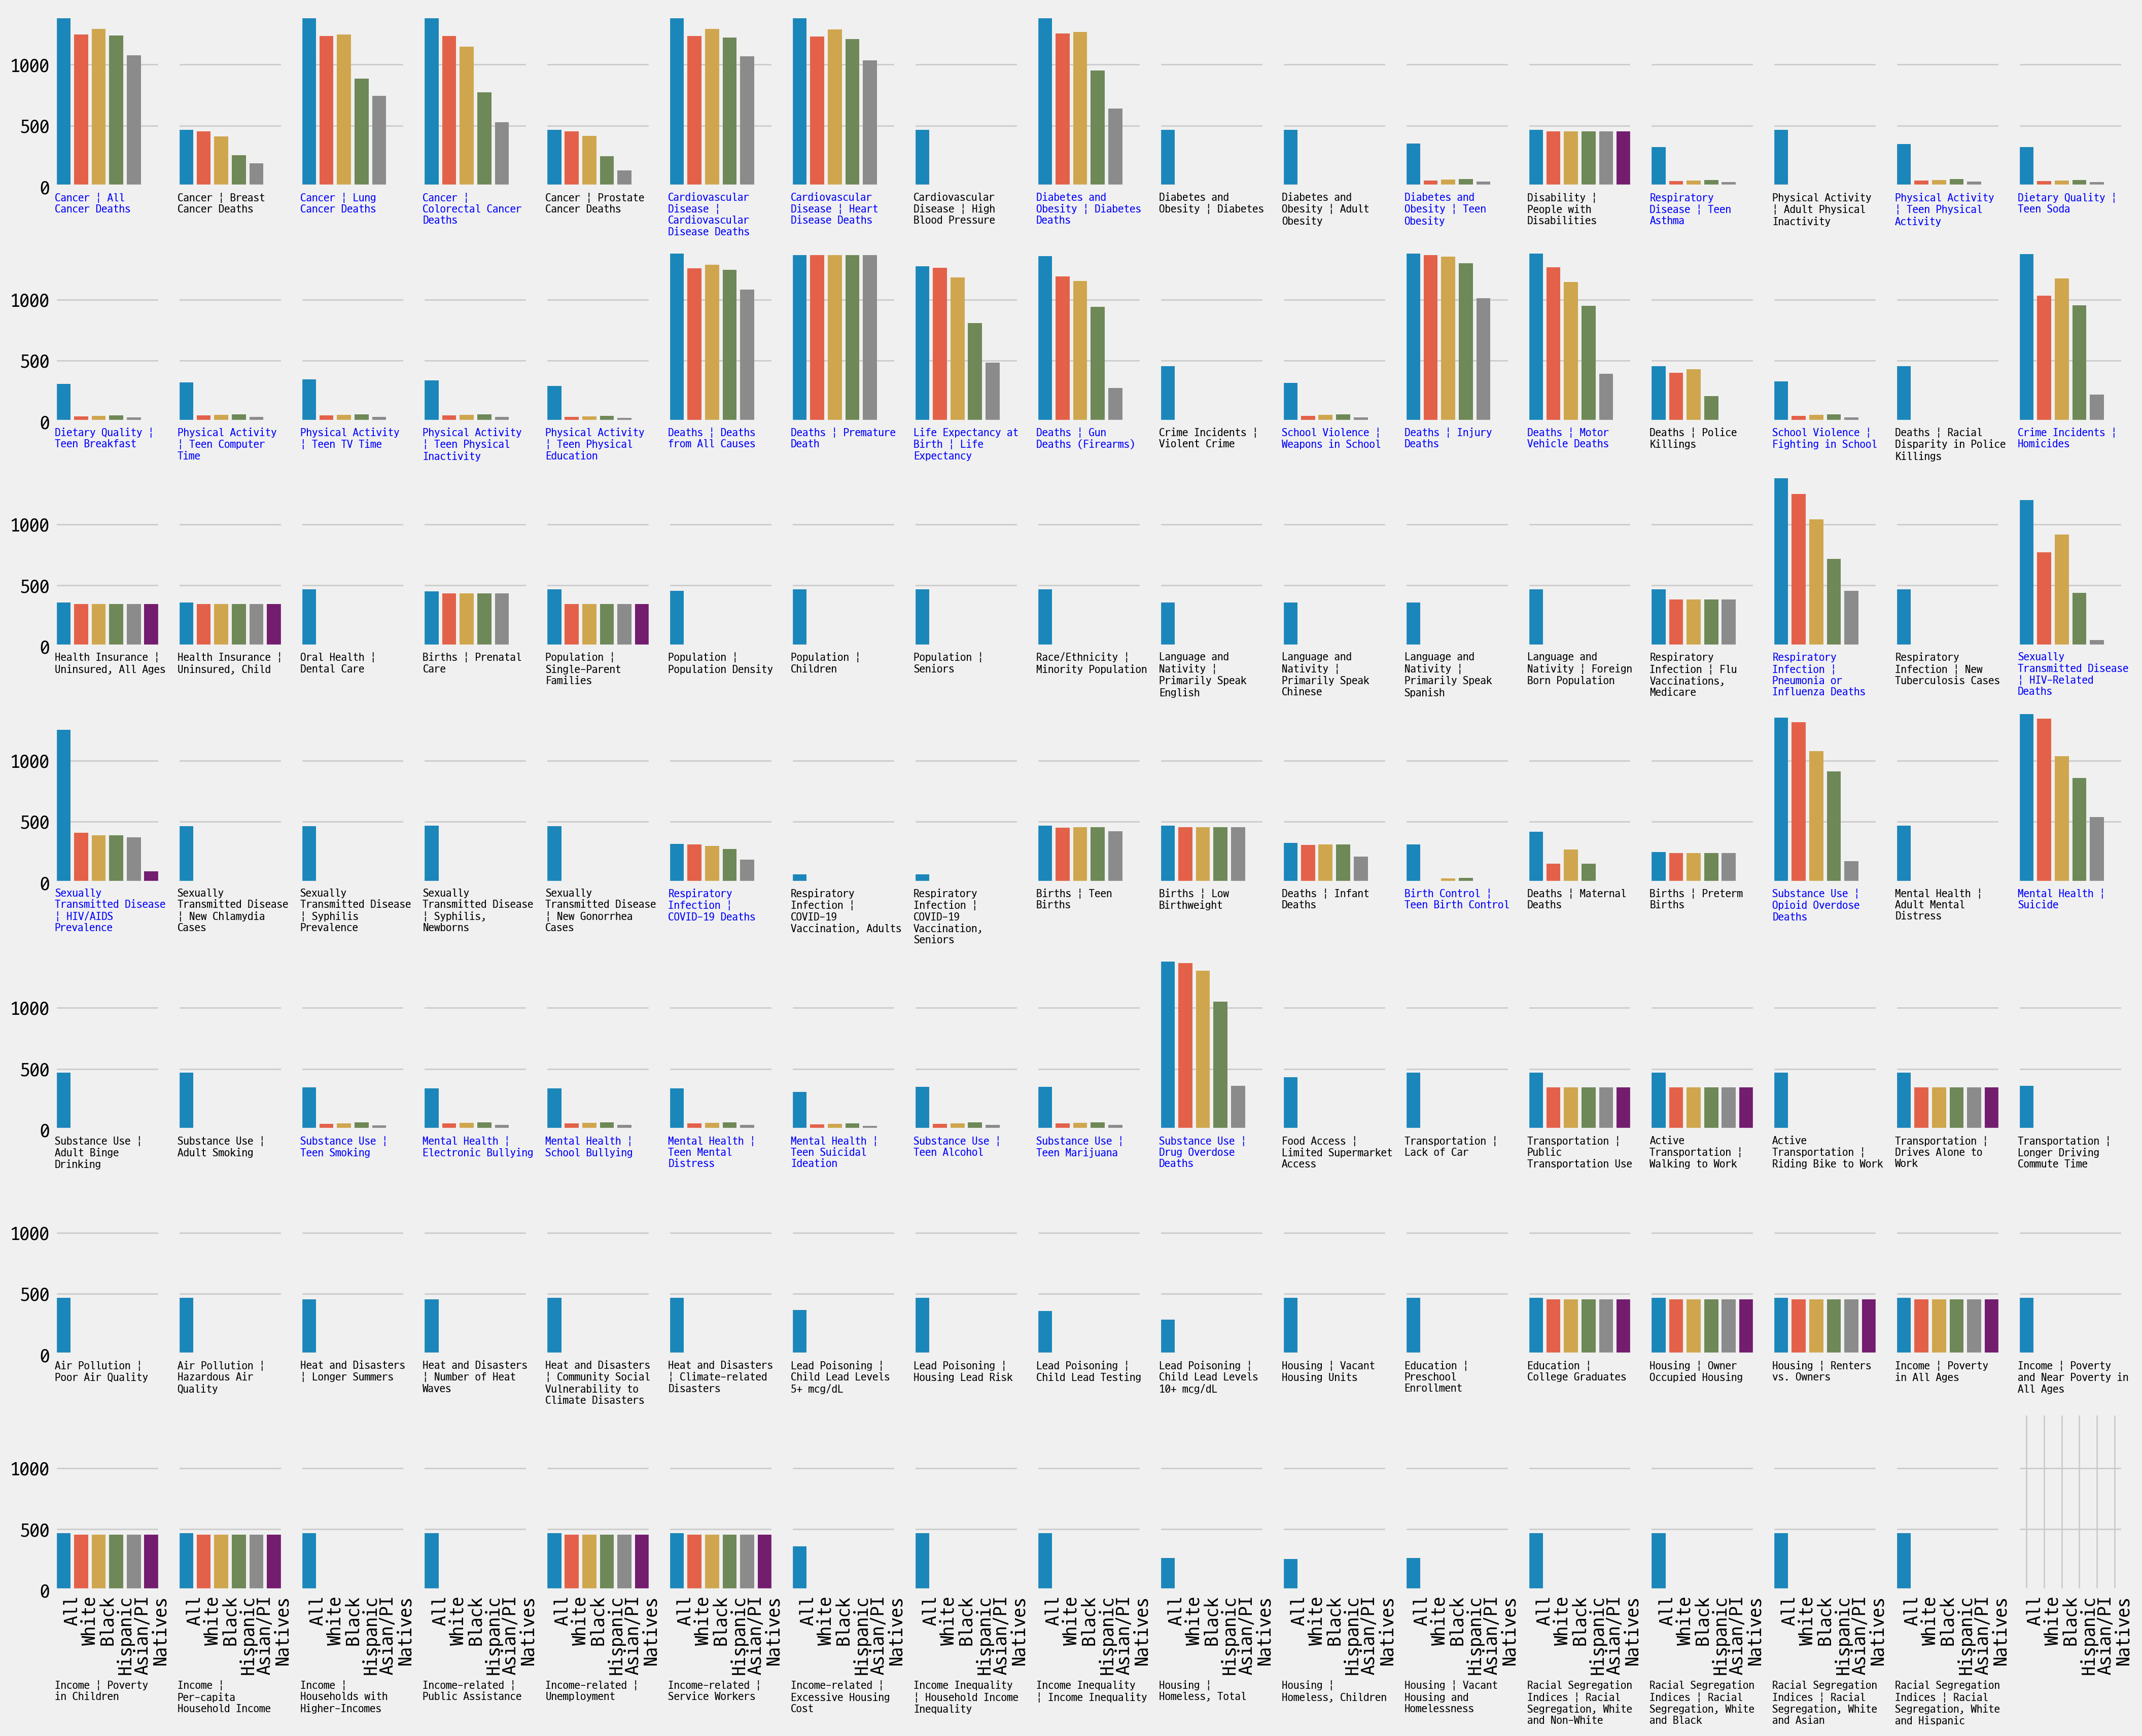

In [43]:

rslt = rslt_dict['metric_label','strata_race_label']

fig, axes = plt.subplots(7,17,figsize=(21,17),sharex=True,sharey=True)

for n,ax in enumerate(axes.flatten()):
    plt.setp(ax.get_xticklabels(),ha = 'left',rotation = 90)
    if n >= len(rslt) : continue
    sns.barplot(x=rslt.iloc[n].index, y = rslt.iloc[n].values,ax =ax)
    feat_name = rslt.index[n]
    color = 'b' if stratified_label_sex[feat_name] else 'k'
    ax.set_xlabel(str_cutter(feat_name,20),loc='left',fontsize = 8.3,color=color)
    
pass

- 도시 별 race record 비율

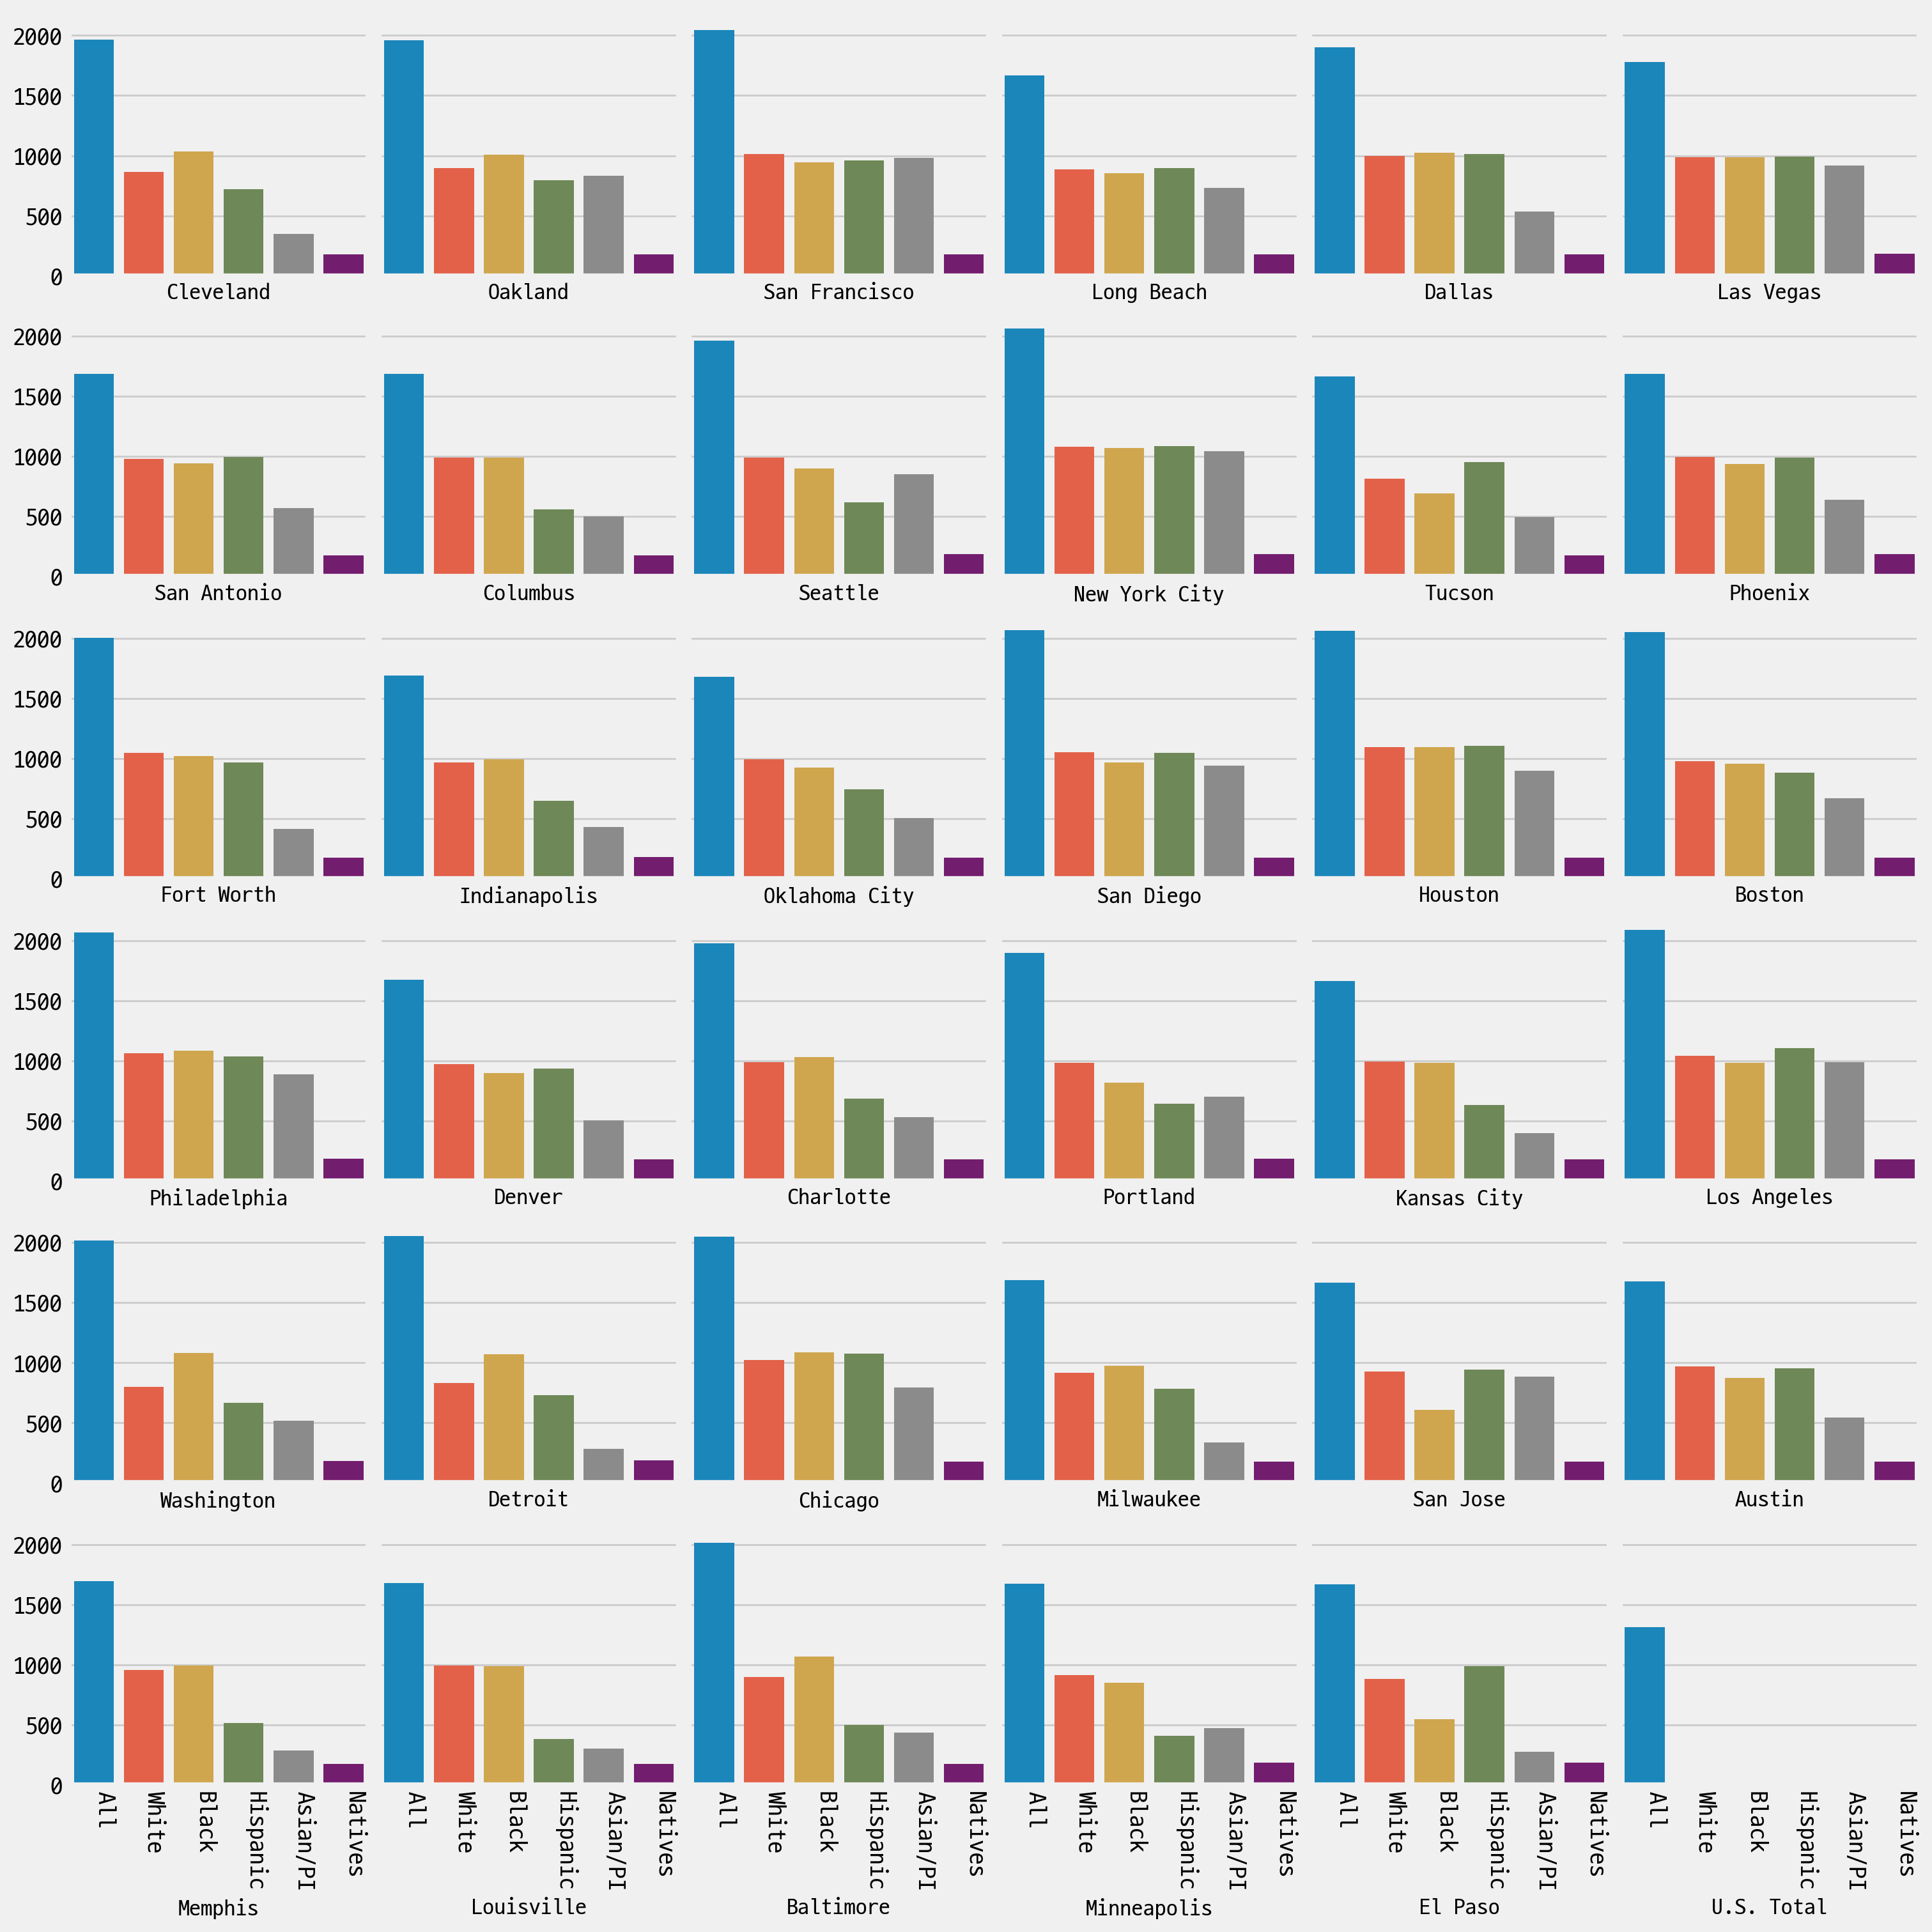

In [44]:
rslt= rslt_dict['geo_label_city','strata_race_label']

fig, axes = plt.subplots(6,6,figsize=(15,15),sharex=True,sharey=True)

for n,ax in enumerate(axes.flatten()):
    sns.barplot(x=rslt.iloc[n].index, y = rslt.iloc[n].values,ax =ax)
    plot_name = rslt.index[n]
    ax.set_xlabel(plot_name,loc='center',fontsize = 13)
    plt.setp(ax.get_xticklabels(),ha = 'left',rotation = 270)
    
pass

- stratified by sex

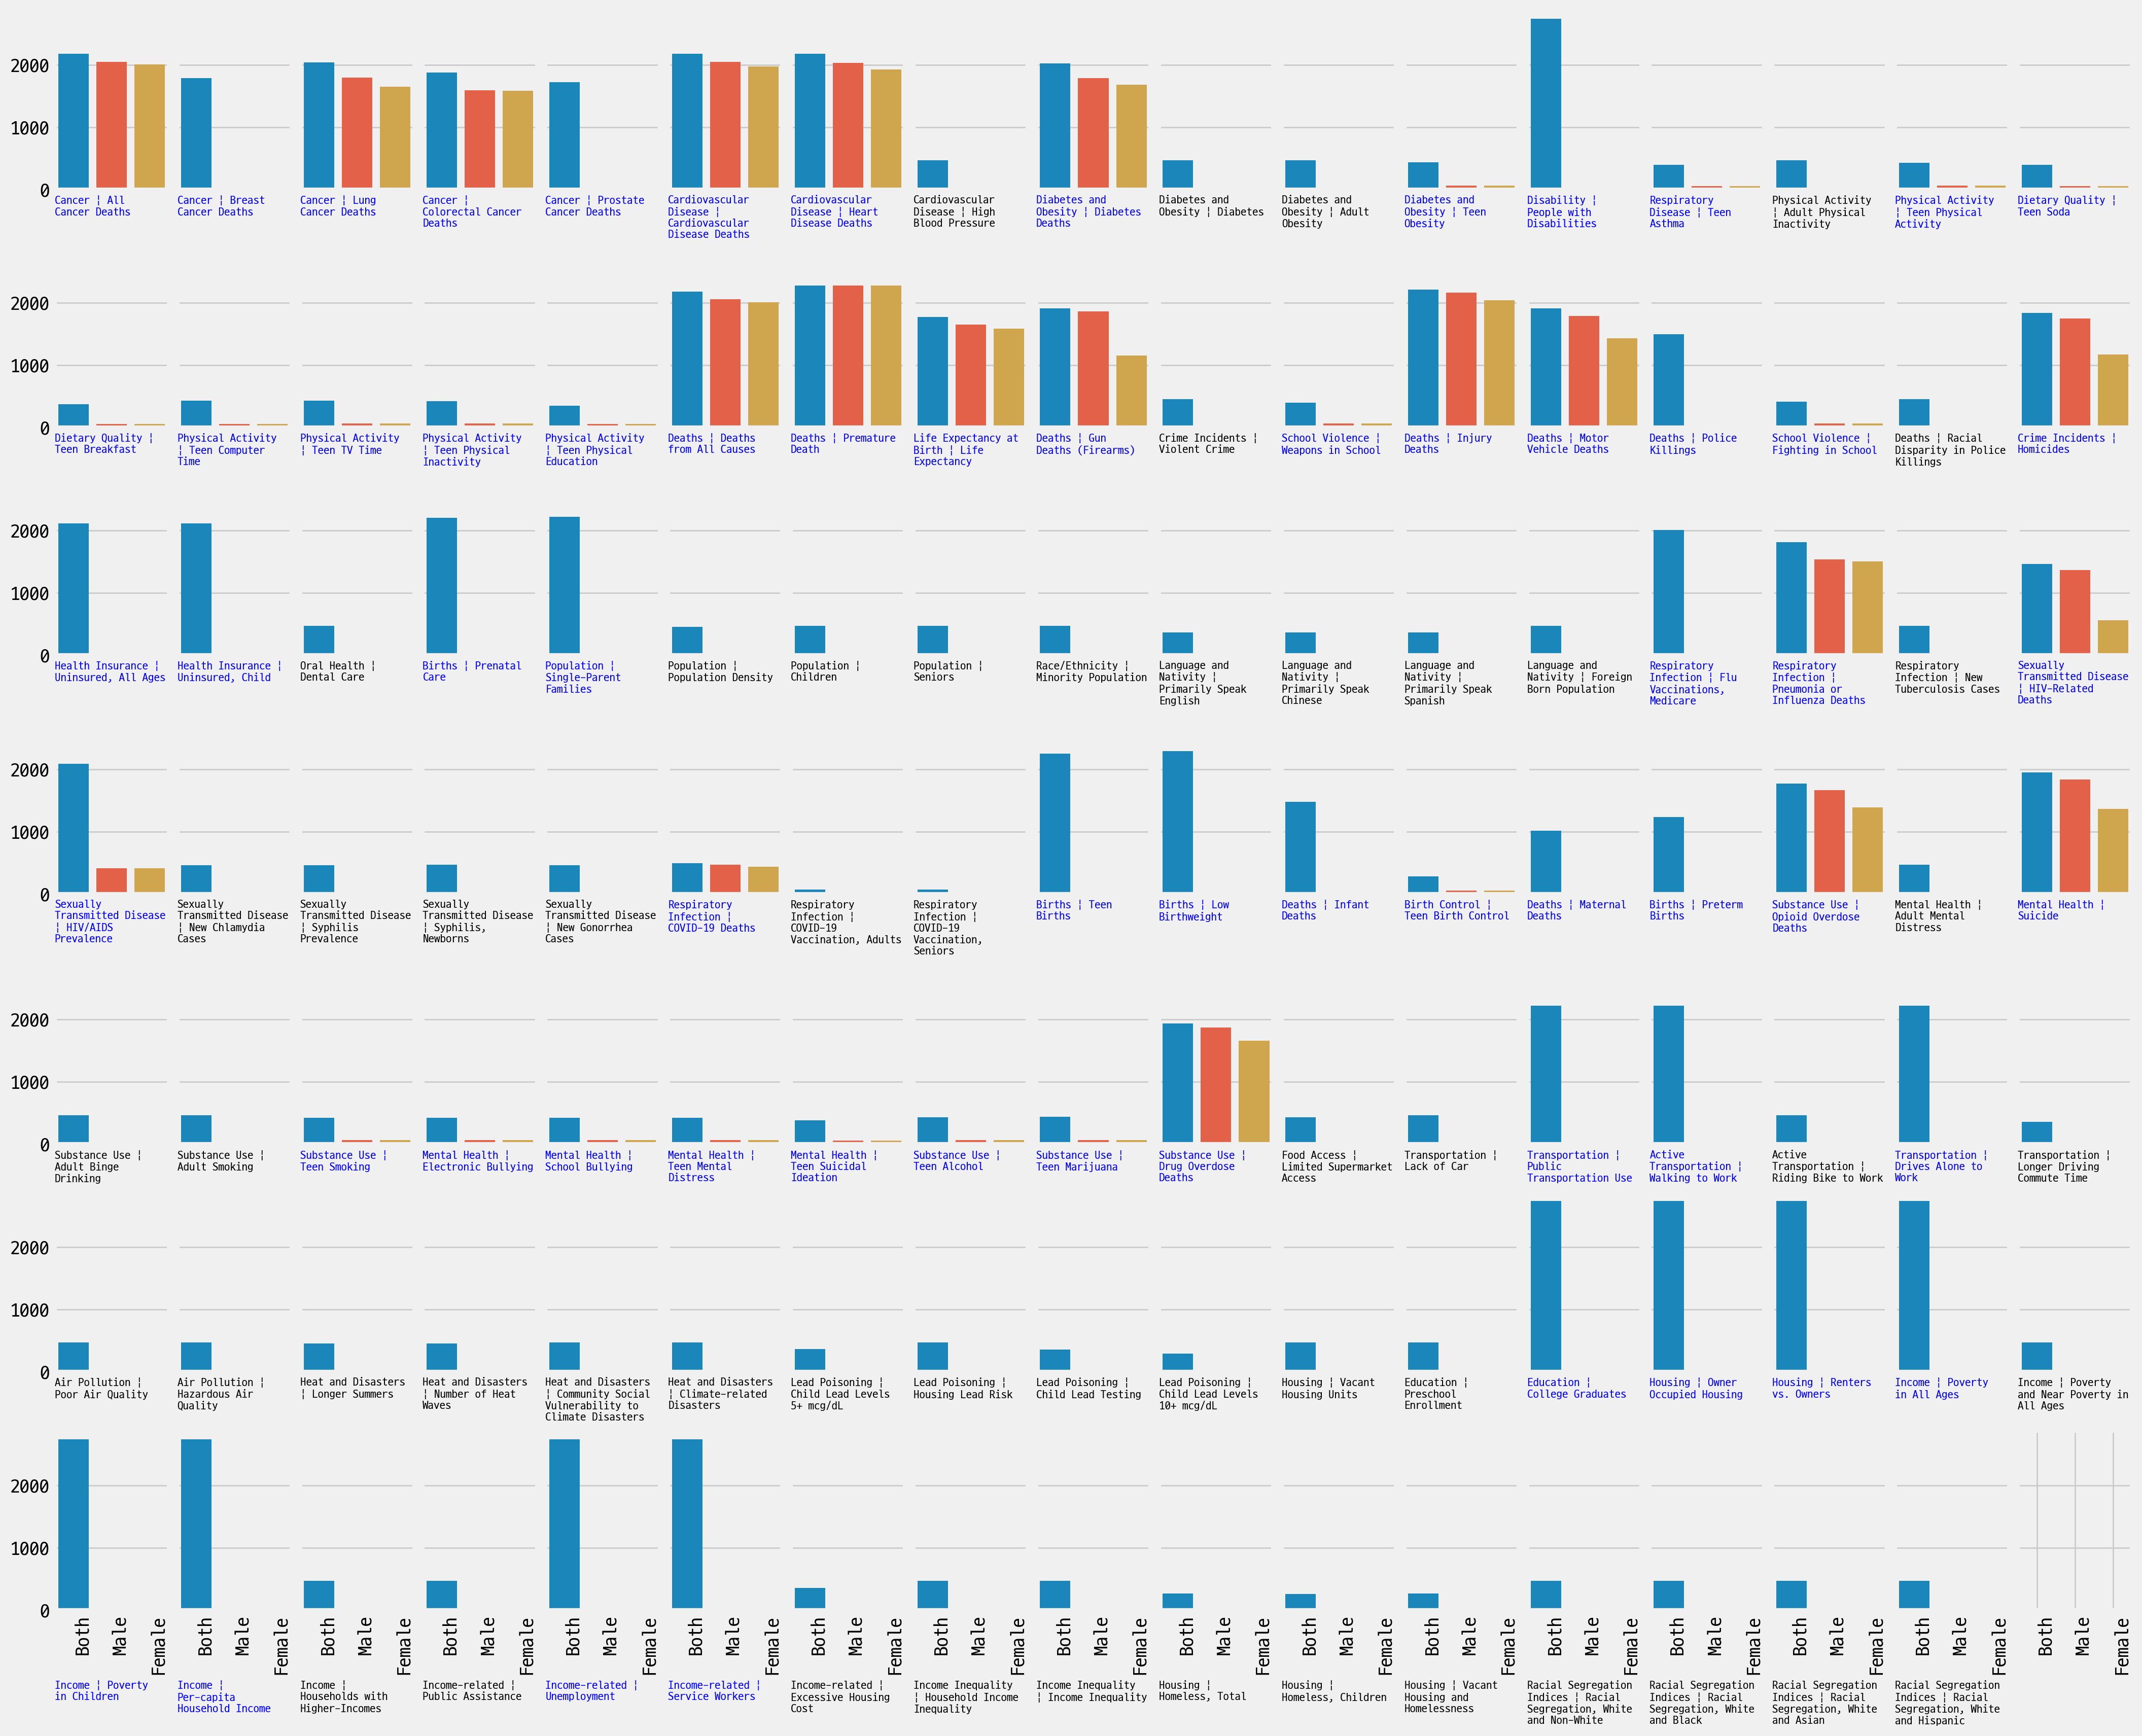

In [100]:

rslt = rslt_dict['metric_label','strata_sex_label']

fig, axes = plt.subplots(7,17,figsize=(21,17),sharex=True,sharey=True)

for n,ax in enumerate(axes.flatten()):
    plt.setp(ax.get_xticklabels(),ha = 'left',rotation = 90)
    if n >= len(rslt) : continue
    sns.barplot(x=rslt.iloc[n].index, y = rslt.iloc[n].values,ax =ax)
    feat_name = rslt.index[n]
    color = 'b' if stratified_label_race[feat_name] else 'k'
    ax.set_xlabel(str_cutter(feat_name,20),loc='left',fontsize = 8.3,color=color)
    
pass

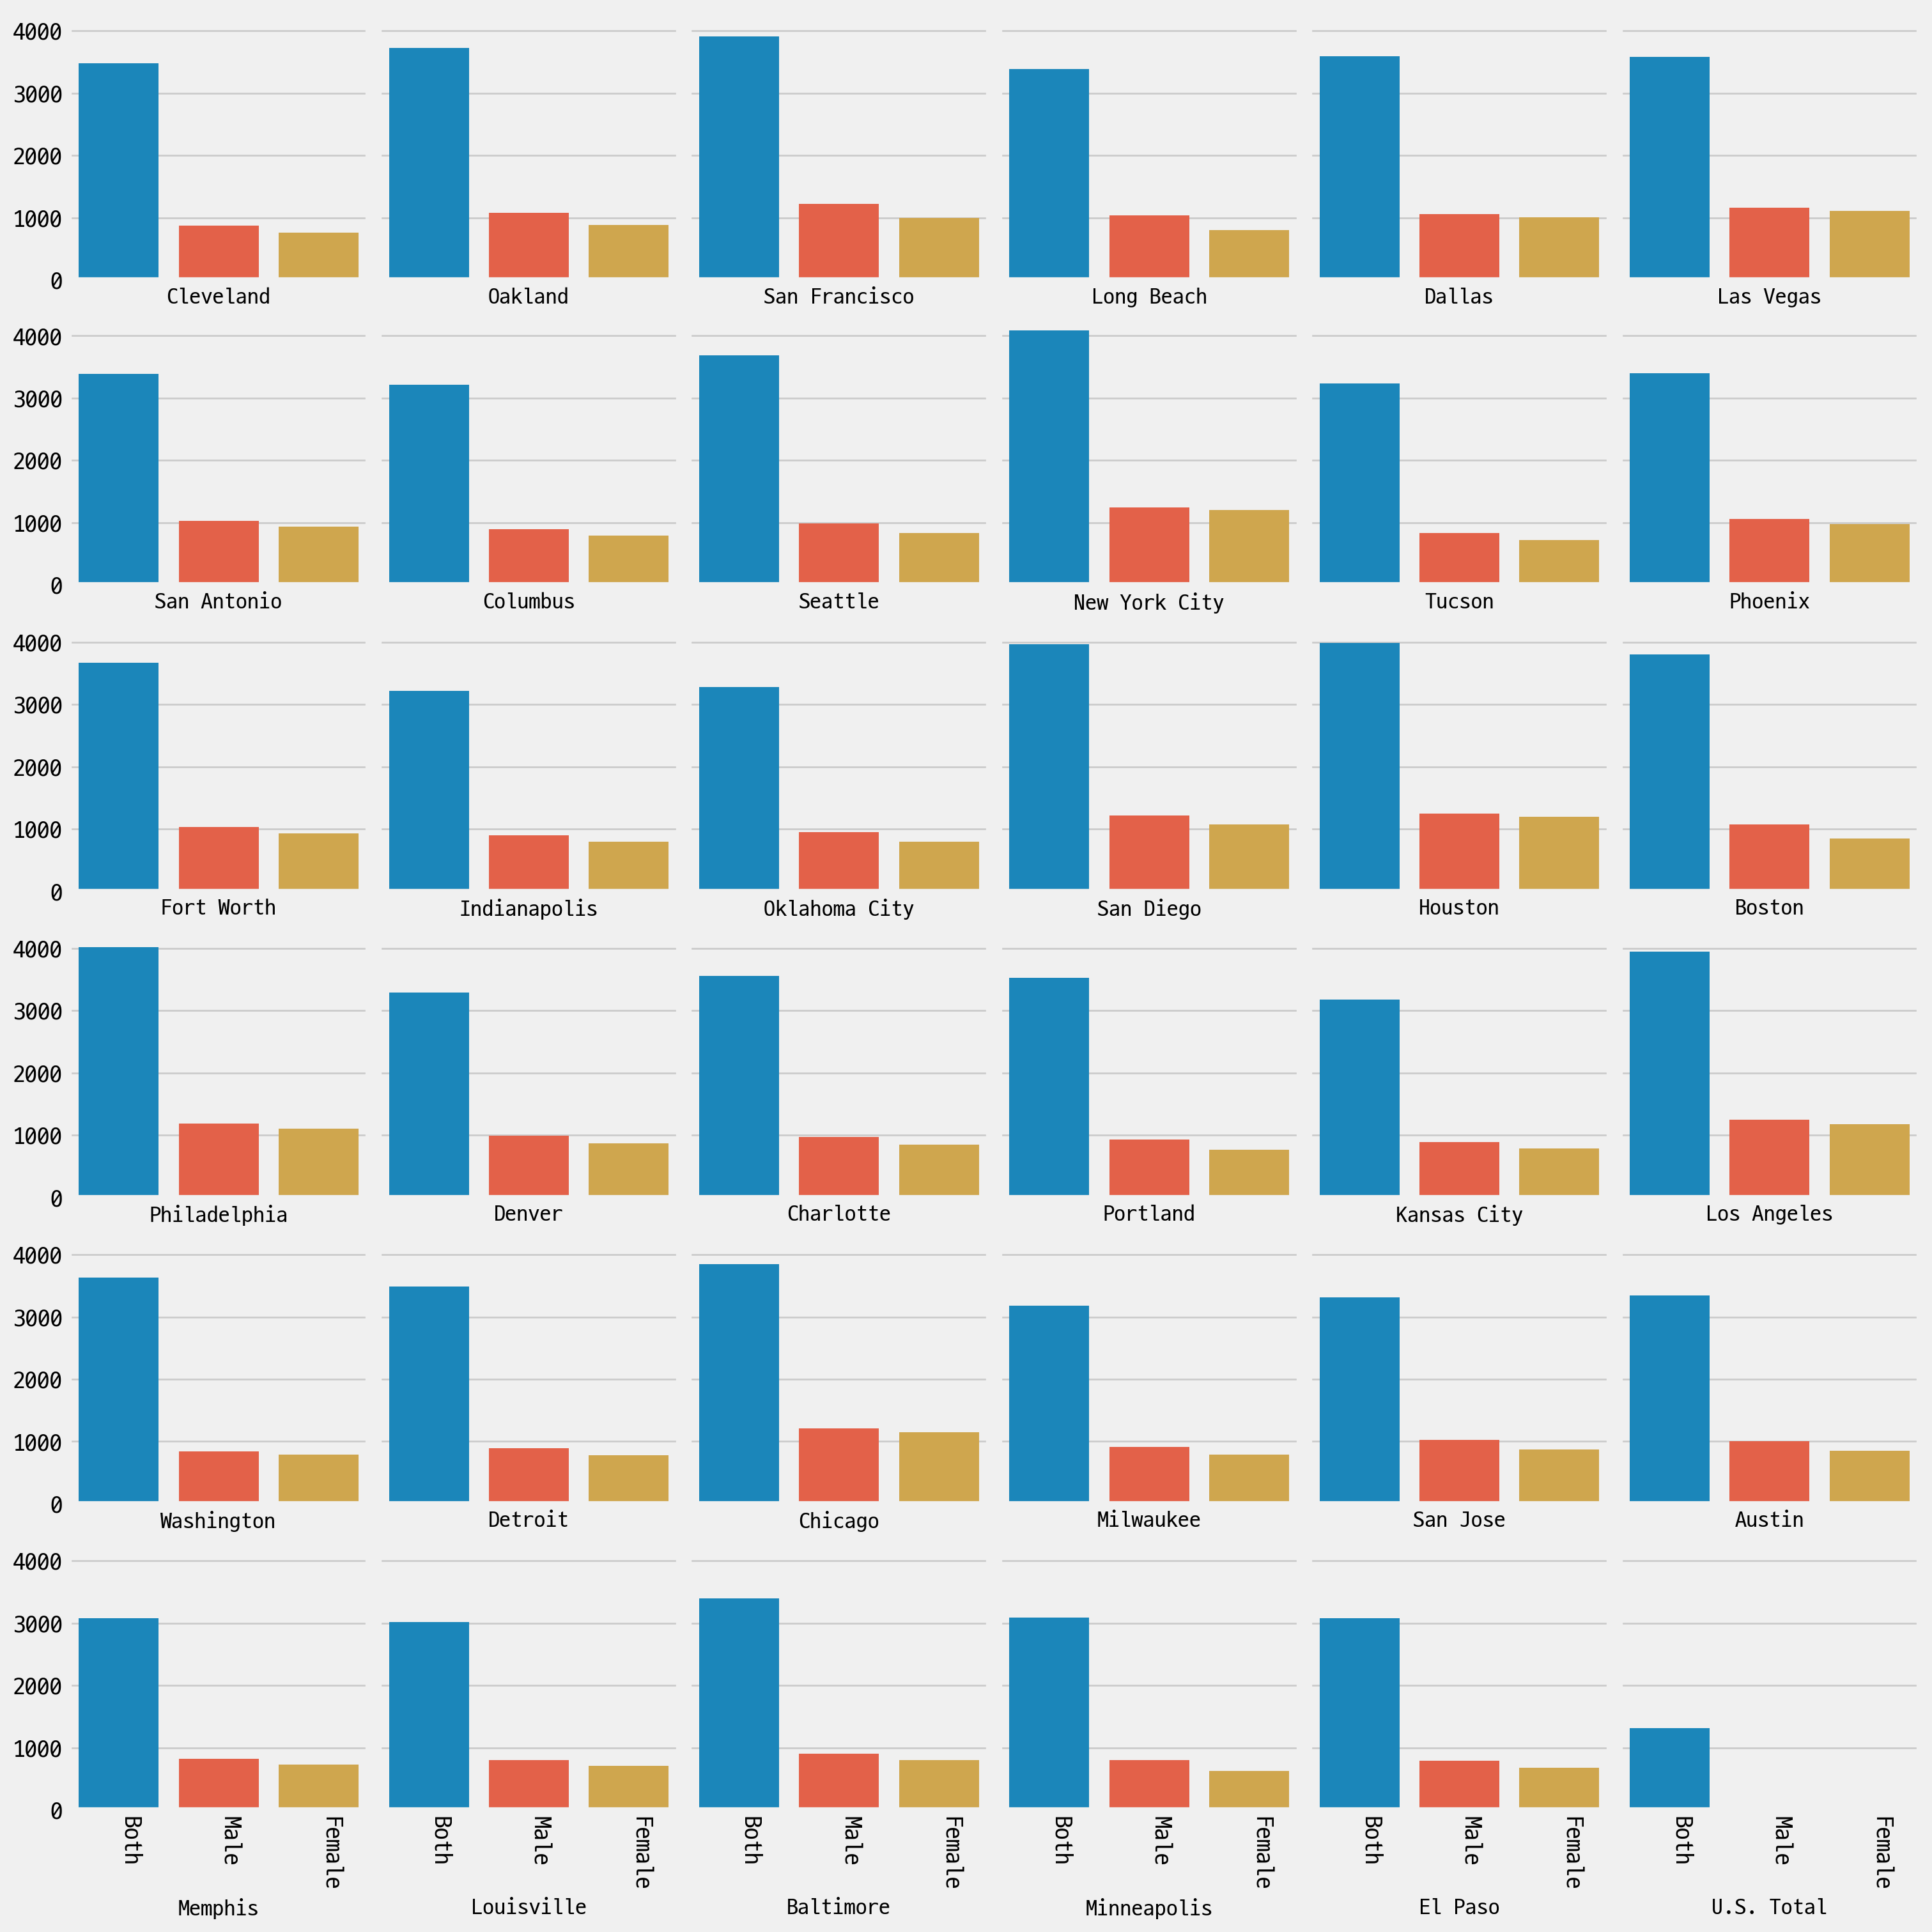

In [46]:
rslt= rslt_dict['geo_label_city','strata_sex_label']

fig, axes = plt.subplots(6,6,figsize=(15,15),sharex=True,sharey=True)

for n,ax in enumerate(axes.flatten()):
    sns.barplot(x=rslt.iloc[n].index, y = rslt.iloc[n].values,ax =ax)
    plot_name = rslt.index[n]
    ax.set_xlabel(plot_name,loc='center',fontsize = 13)
    plt.setp(ax.get_xticklabels(),ha = 'left',rotation = 270)
    
pass

### city, year, metric_label 별 데이터 확인

- Teen Obesity

In [47]:
rslt = rslt_dict['metric_label','strata_race_label']

In [48]:
high_key = rslt.index[11]
high_key

'Diabetes and Obesity | Teen Obesity'

571


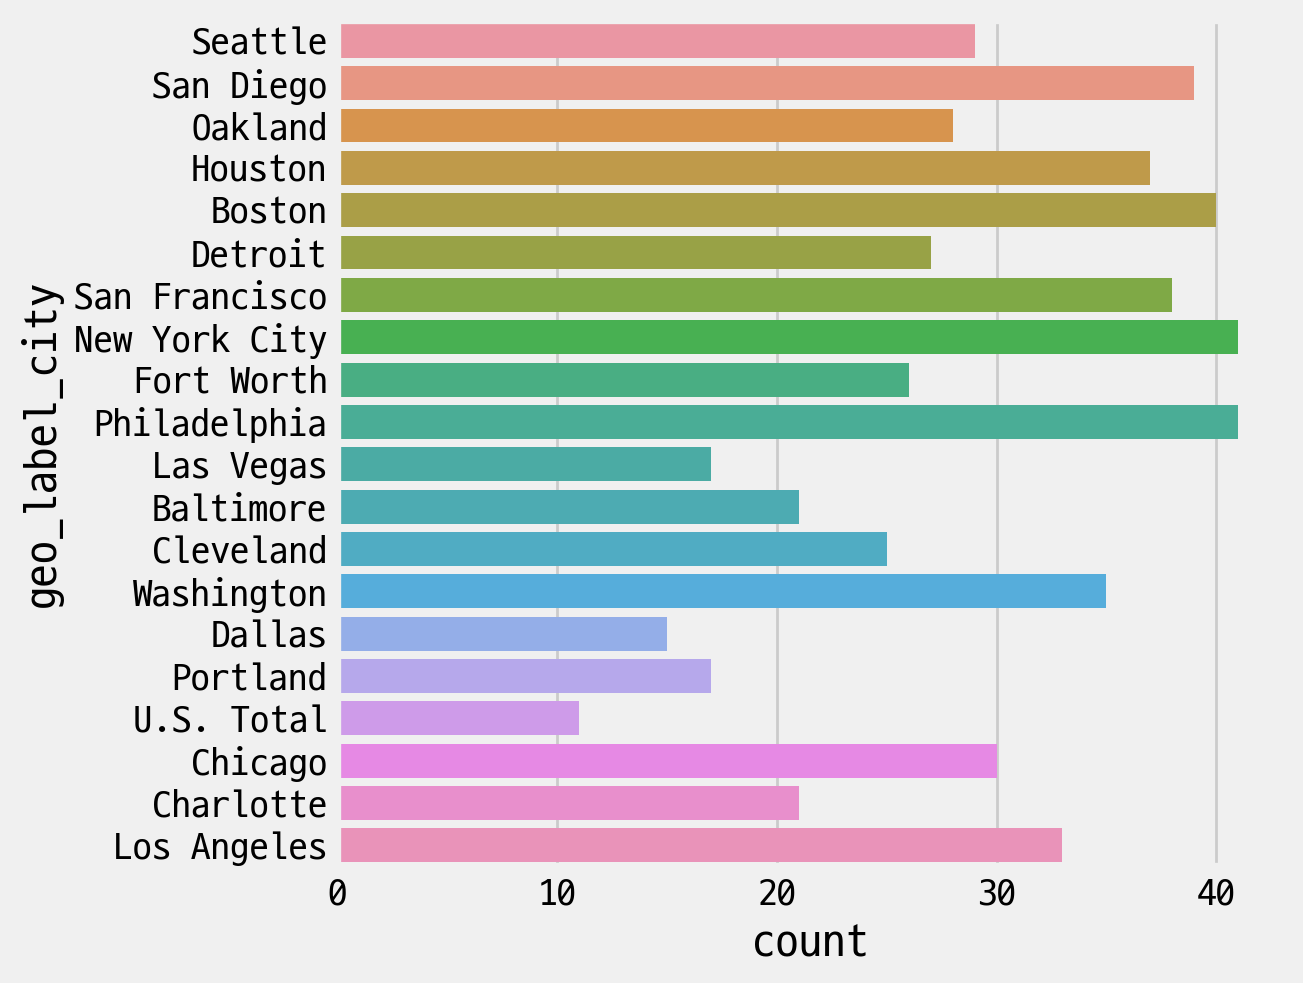

In [49]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]
print(len(df_high))

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='geo_label_city',ax=ax);

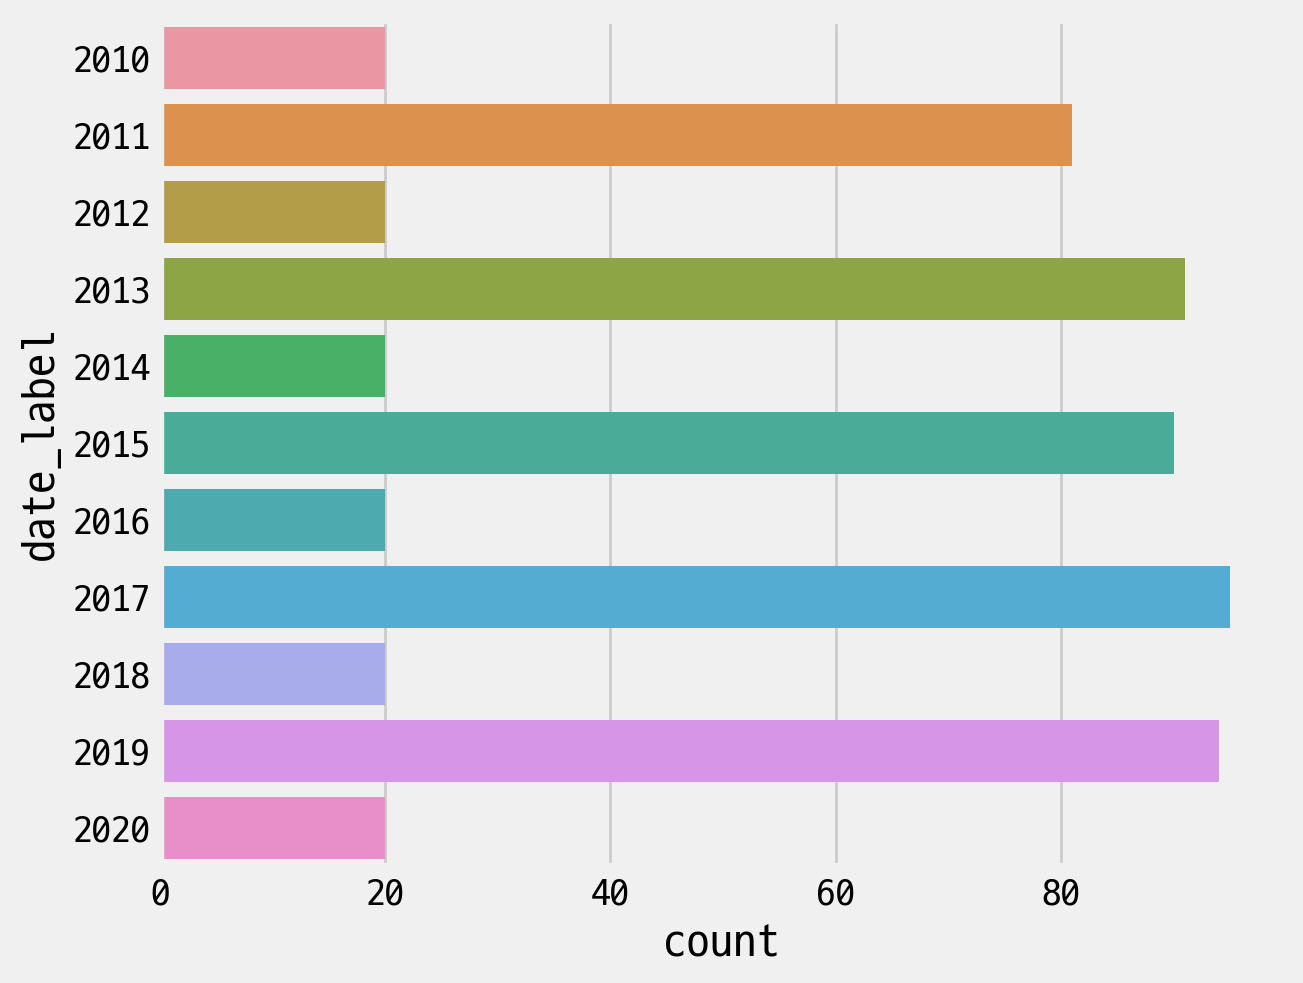

In [50]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='date_label',ax=ax);

In [51]:
import functools

cond_h1 = df_racesex['metric_label'] == high_key
cond_h2 = df_racesex['date_label'] == 2011
cond_h3 = df_racesex['geo_label_city'] == 'San Francisco' 

cond_list = [cond_h1,cond_h2,cond_h3]

cond_hb = functools.reduce(lambda x,y : x&y, cond_list)

df_high = df_racesex[cond_hb]

display(df_high.head(10))
display(len(df_high))

,strata_race_label,strata_sex_label,metric_label,geo_label_city,date_label,value
39548,All,Both,Diabetes and Obesity | Teen Obesity,San Francisco,2011,7.5
39578,Asian/PI,Both,Diabetes and Obesity | Teen Obesity,San Francisco,2011,4.5
39616,All,Female,Diabetes and Obesity | Teen Obesity,San Francisco,2011,6.2
39728,Hispanic,Both,Diabetes and Obesity | Teen Obesity,San Francisco,2011,14.9
39887,White,Both,Diabetes and Obesity | Teen Obesity,San Francisco,2011,6.7
40071,All,Male,Diabetes and Obesity | Teen Obesity,San Francisco,2011,8.9


6

- All cancer deaths

In [52]:
high_key = rslt.index[0]
high_key

'Cancer | All Cancer Deaths'

6233


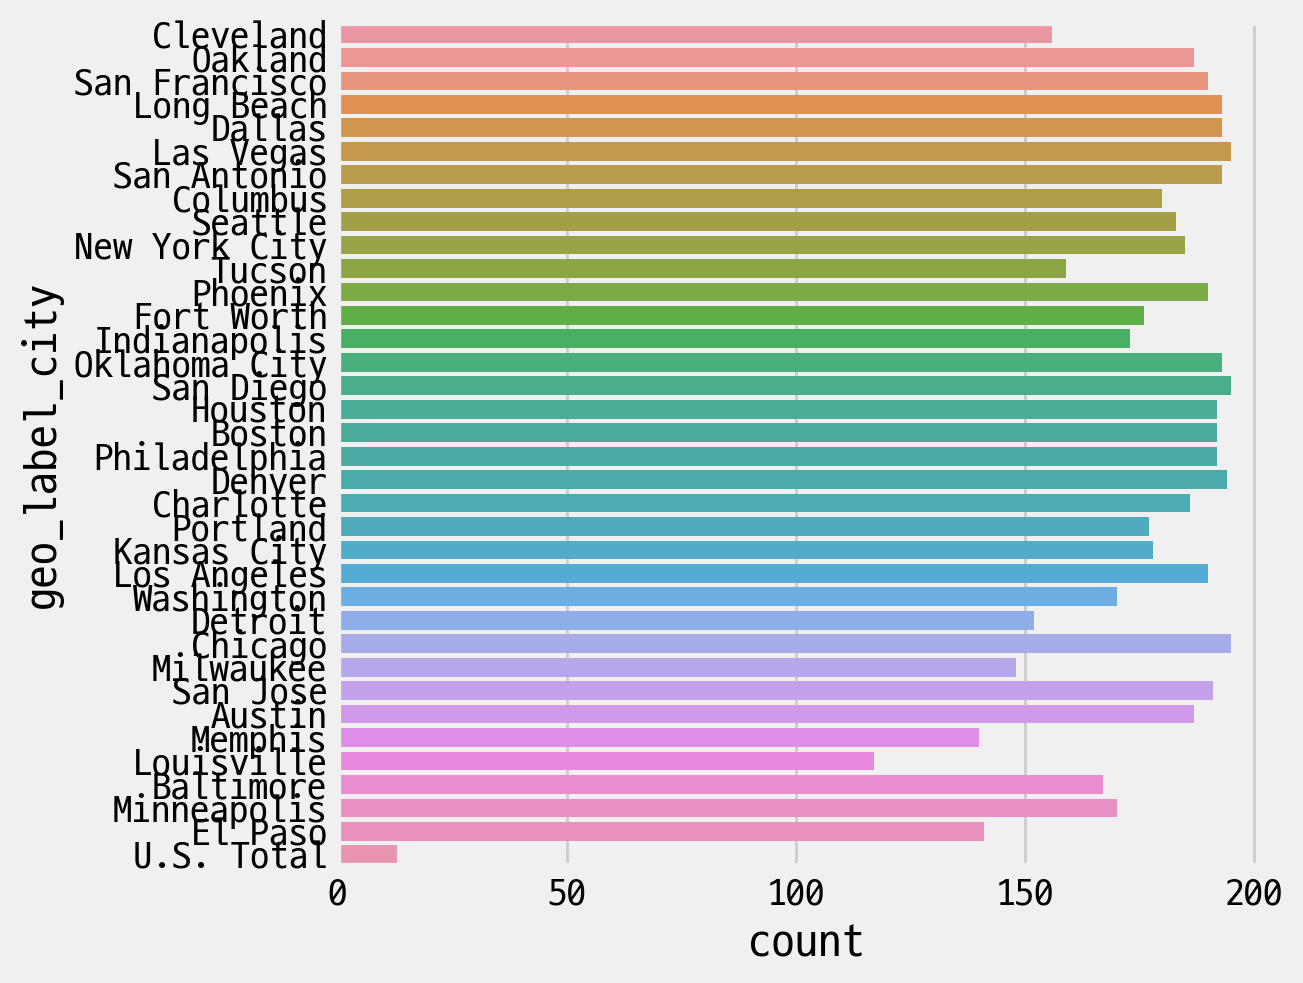

In [53]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]
print(len(df_high))

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='geo_label_city',ax=ax);

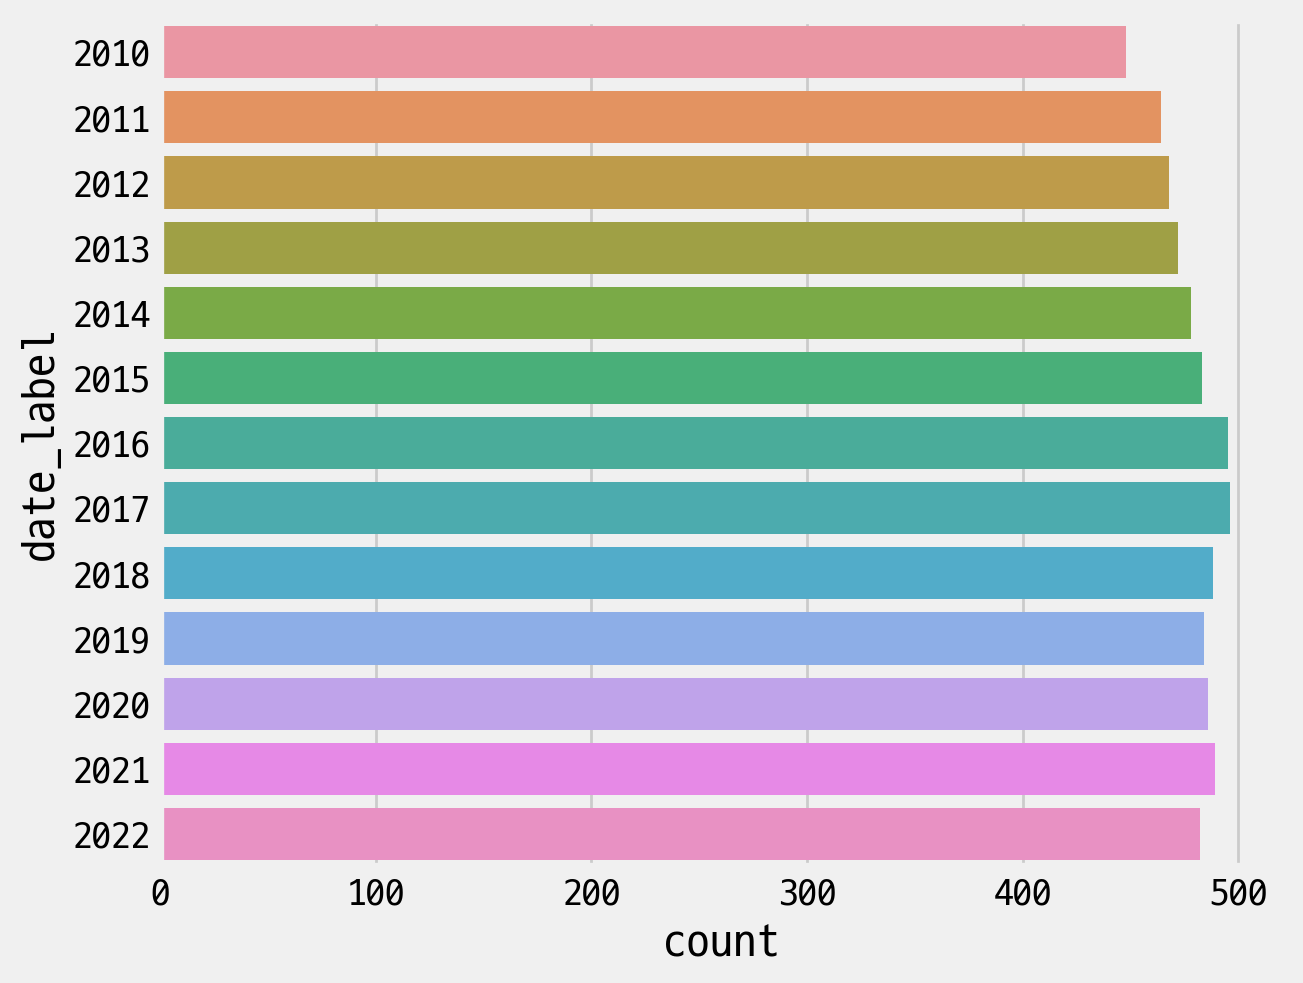

In [54]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='date_label',ax=ax);

In [55]:
import functools

cond_h1 = df_racesex['metric_label'] == high_key
cond_h2 = df_racesex['date_label'] == 2011
cond_h3 = df_racesex['geo_label_city'] == 'San Francisco' 

cond_list = [cond_h1,cond_h2,cond_h3]

cond_hb = functools.reduce(lambda x,y : x&y, cond_list)

df_high = df_racesex[cond_hb]

display(df_high)
display(len(df_high))

,strata_race_label,strata_sex_label,metric_label,geo_label_city,date_label,value
322,Black,Both,Cancer | All Cancer Deaths,San Francisco,2011,222.562258
426,White,Both,Cancer | All Cancer Deaths,San Francisco,2011,165.847714
610,Hispanic,Male,Cancer | All Cancer Deaths,San Francisco,2011,165.823714
1873,Asian/PI,Female,Cancer | All Cancer Deaths,San Francisco,2011,110.651723
2668,Asian/PI,Male,Cancer | All Cancer Deaths,San Francisco,2011,160.028621
2835,Hispanic,Both,Cancer | All Cancer Deaths,San Francisco,2011,128.005829
2956,Black,Female,Cancer | All Cancer Deaths,San Francisco,2011,202.271664
3323,All,Female,Cancer | All Cancer Deaths,San Francisco,2011,126.537683
3353,Hispanic,Female,Cancer | All Cancer Deaths,San Francisco,2011,103.337129
4115,White,Male,Cancer | All Cancer Deaths,San Francisco,2011,183.905788


15

In [56]:
df_high[['strata_race_label','strata_sex_label']].value_counts()

strata_race_label  strata_sex_label
All                Both                1
                   Female              1
                   Male                1
Asian/PI           Both                1
                   Female              1
                   Male                1
Black              Both                1
                   Female              1
                   Male                1
Hispanic           Both                1
                   Female              1
                   Male                1
White              Both                1
                   Female              1
                   Male                1
Name: count, dtype: int64

- People with disabilities

In [57]:
high_key = rslt.index[12]
high_key

'Disability | People with Disabilities'

2743


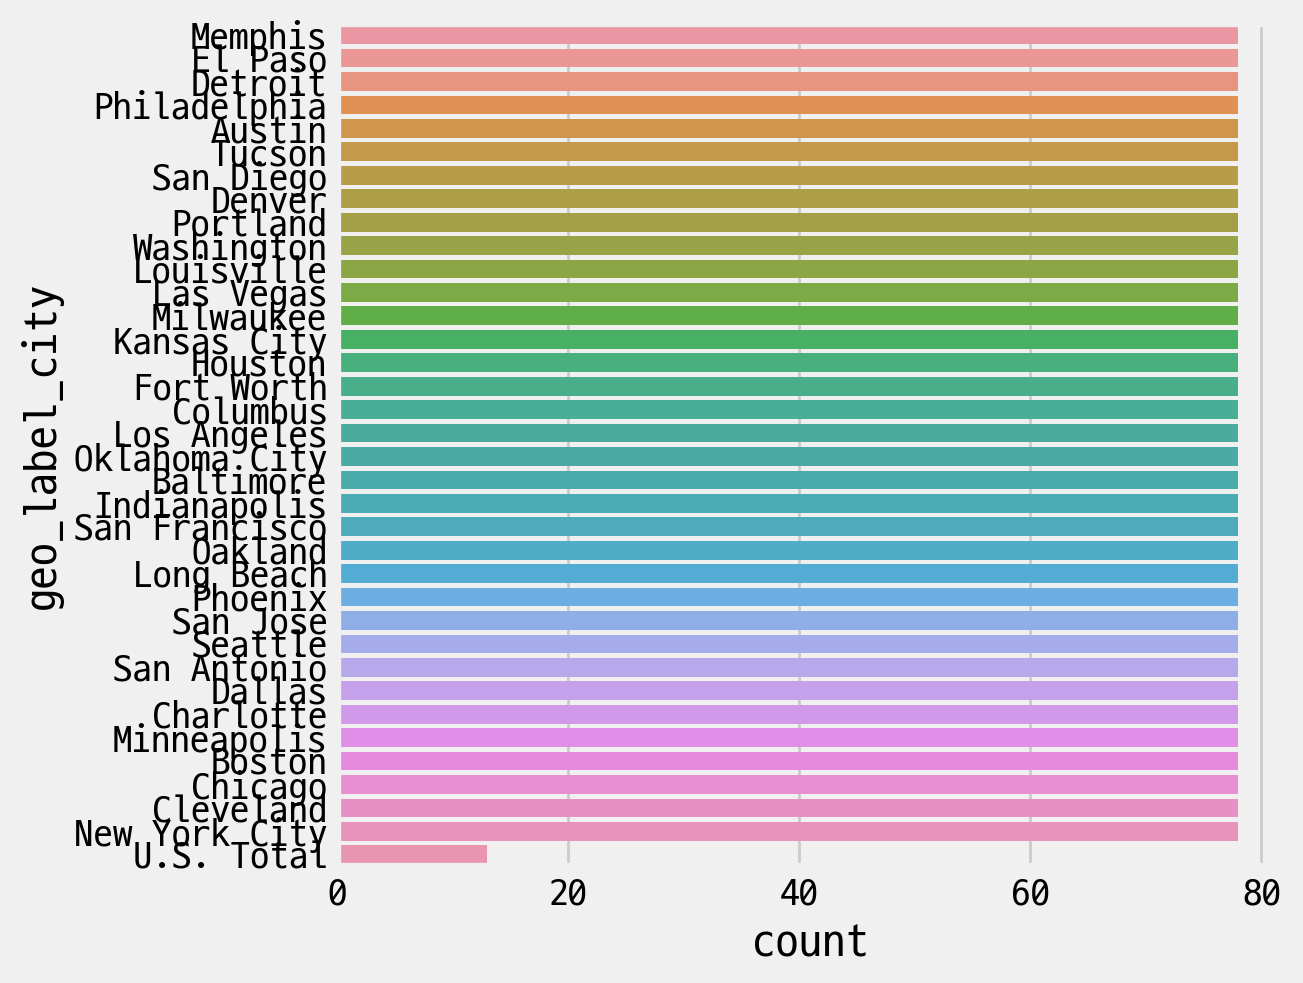

In [58]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]
print(len(df_high))

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='geo_label_city',ax=ax);

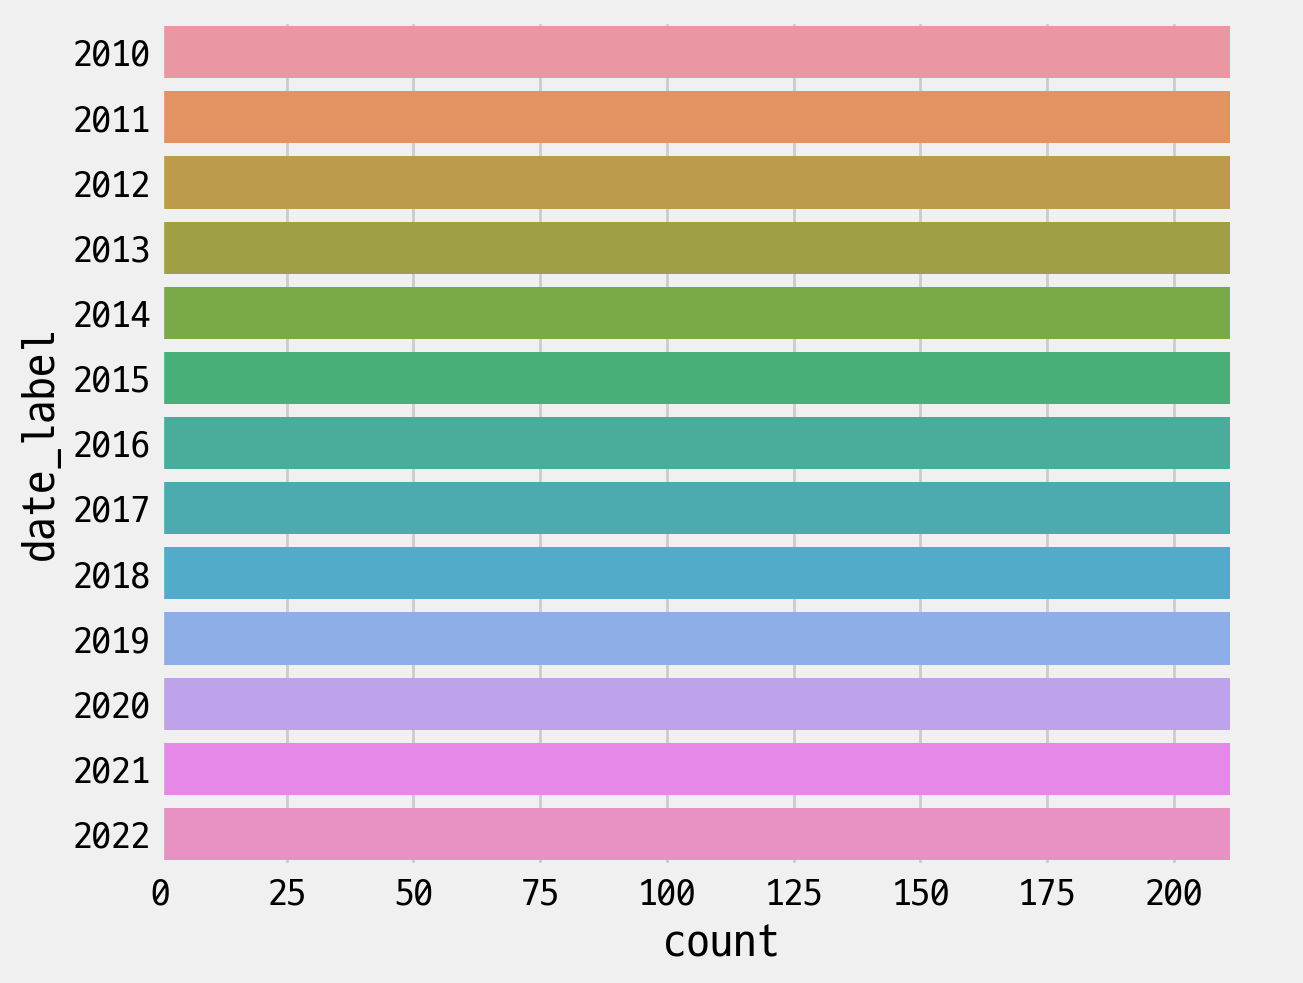

In [59]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='date_label',ax=ax);

In [60]:
import functools

cond_h1 = df_racesex['metric_label'] == high_key
cond_h2 = df_racesex['date_label'] == 2011
cond_h3 = df_racesex['geo_label_city'] == 'San Francisco' 

cond_list = [cond_h1,cond_h2,cond_h3]

cond_hb = functools.reduce(lambda x,y : x&y, cond_list)

df_high = df_racesex[cond_hb]

display(df_high)
display(len(df_high))

,strata_race_label,strata_sex_label,metric_label,geo_label_city,date_label,value
42314,Black,Both,Disability | People with Disabilities,San Francisco,2011,22.071987
42488,Natives,Both,Disability | People with Disabilities,San Francisco,2011,24.133187
42589,Hispanic,Both,Disability | People with Disabilities,San Francisco,2011,9.595788
42657,Asian/PI,Both,Disability | People with Disabilities,San Francisco,2011,10.208206
42697,White,Both,Disability | People with Disabilities,San Francisco,2011,9.479538
42826,All,Both,Disability | People with Disabilities,San Francisco,2011,10.582333


6

In [61]:
df_high[['strata_race_label','strata_sex_label']].value_counts()

strata_race_label  strata_sex_label
All                Both                1
Asian/PI           Both                1
Black              Both                1
Hispanic           Both                1
Natives            Both                1
White              Both                1
Name: count, dtype: int64

- Dietary Quality | Teen Soda 

In [88]:
high_key = rslt.index[16]
high_key

'Dietary Quality | Teen Soda'

518


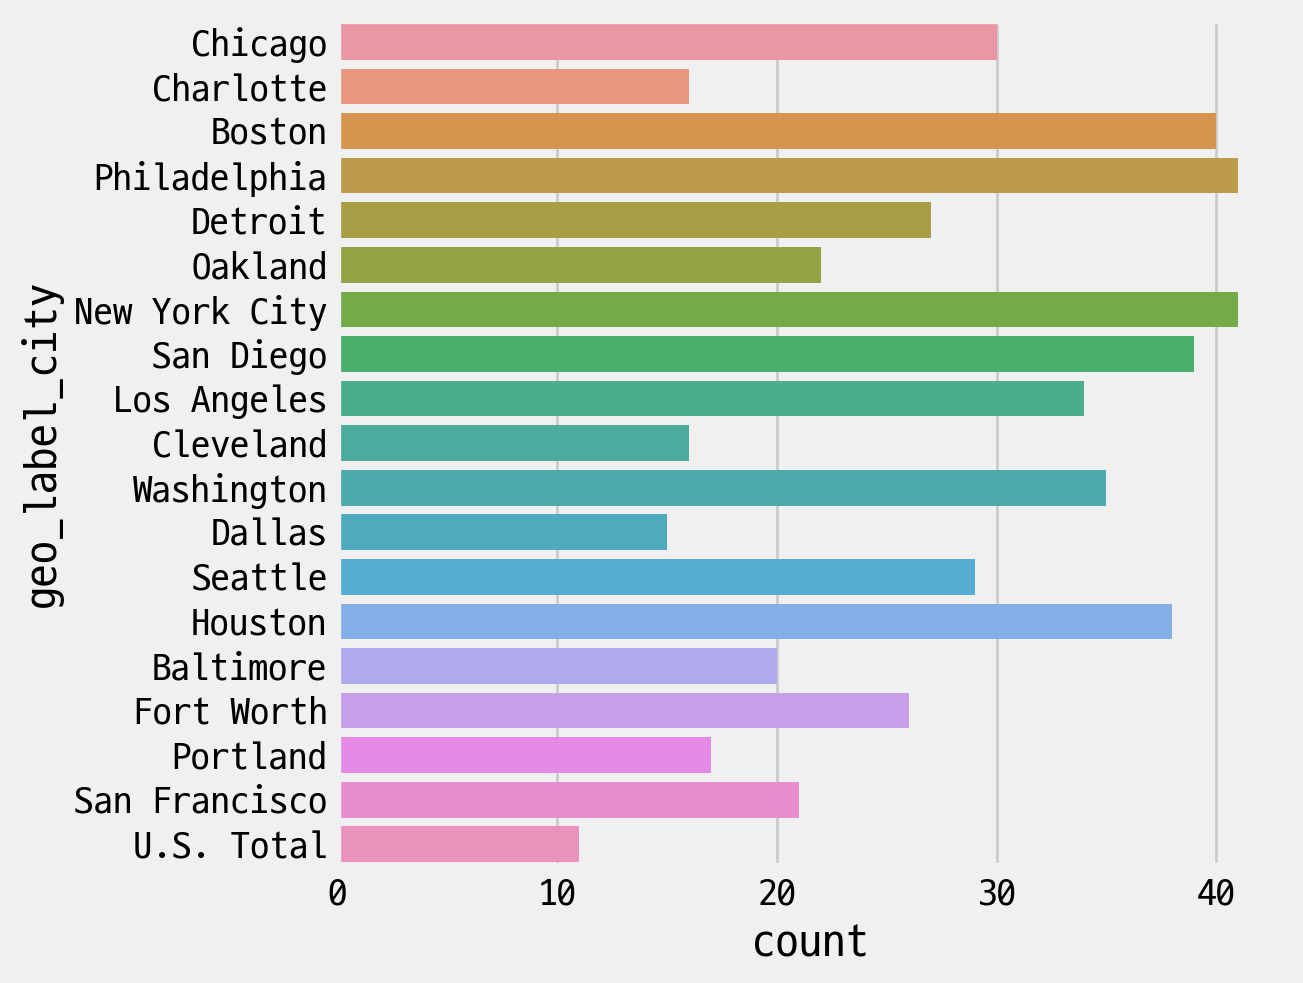

In [89]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]
print(len(df_high))

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='geo_label_city',ax=ax);

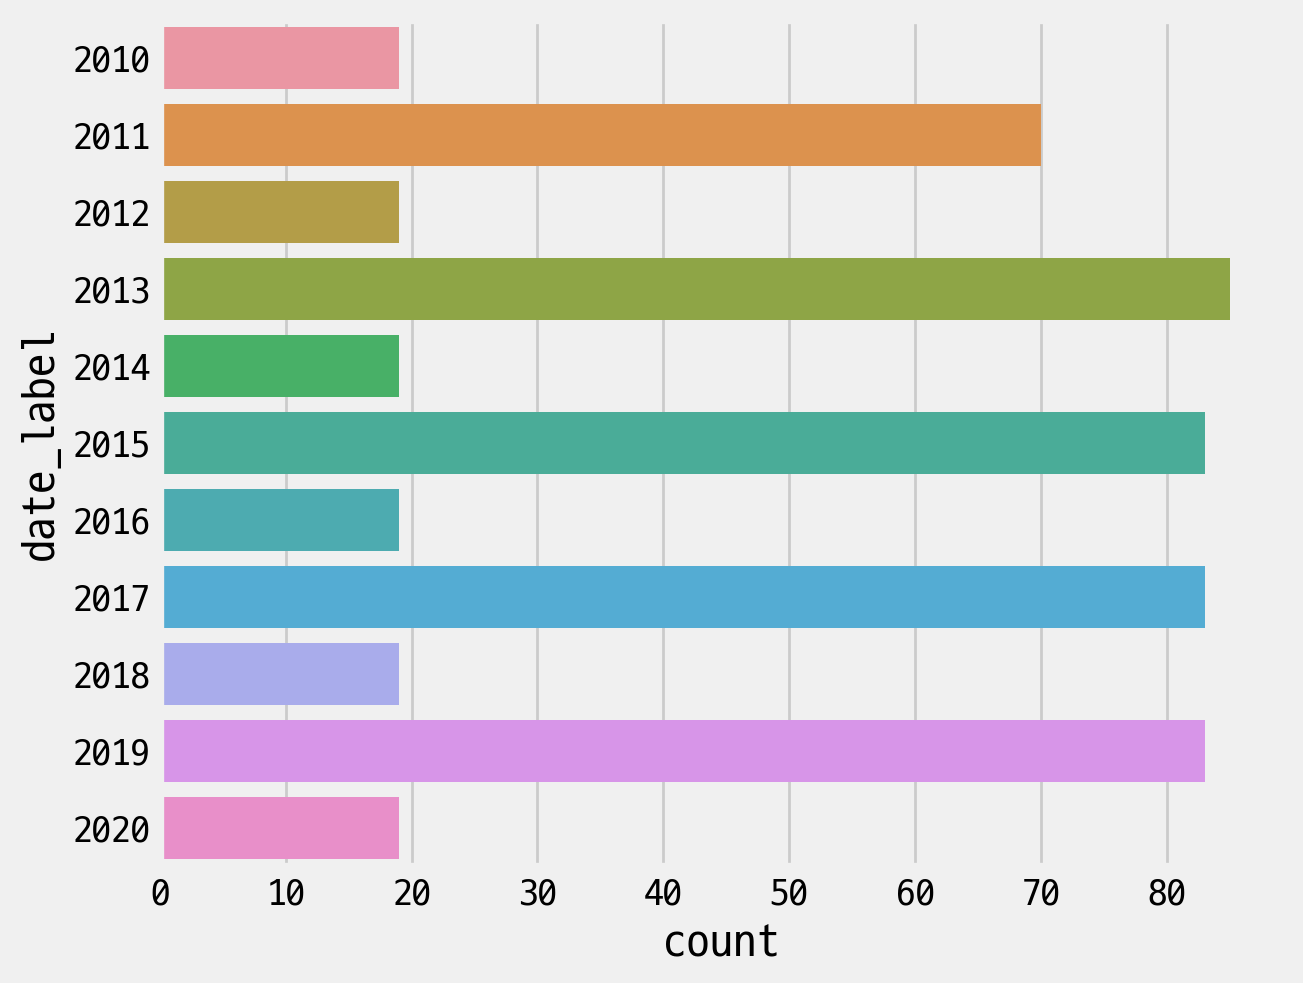

In [90]:
cond_h = df_racesex['metric_label'] == high_key

df_high = df_racesex[cond_h]

fig, ax = plt.subplots()

sns.countplot(data=df_high,y='date_label',ax=ax);

In [98]:
import functools

cond_h1 = df_racesex['metric_label'] == high_key
cond_h2 = df_racesex['date_label'] == 2011
cond_h3 = df_racesex['geo_label_city'] == 'San Francisco' 

cond_list = [cond_h1,cond_h2,cond_h3]

cond_hb = functools.reduce(lambda x,y : x&y, cond_list)

df_high = df_racesex[cond_hb]

display(df_high)
display(len(df_high))

,strata_race_label,strata_sex_label,metric_label,geo_label_city,date_label,value
44877,All,Both,Dietary Quality | Teen Soda,San Francisco,2011,9.7


1

- 정말 각 race, sex, city, year, label 별로 하나의 값만 있는지 pivot table로 만들면서 확인 필요

pt2.strata_race_label.unique() #set, list의 경우는 unique로는 안되고 tuple로 해야 함

2. geo_strata 관련 column들 확인

In [62]:
df['geo_label_city'].unique()

array(['Cleveland', 'Oakland', 'San Francisco', 'Long Beach', 'Dallas',
       'Las Vegas', 'San Antonio', 'Columbus', 'Seattle', 'New York City',
       'Tucson', 'Phoenix', 'Fort Worth', 'Indianapolis', 'Oklahoma City',
       'San Diego', 'Houston', 'Boston', 'Philadelphia', 'Denver',
       'Charlotte', 'Portland', 'Kansas City', 'Los Angeles',
       'Washington', 'Detroit', 'Chicago', 'Milwaukee', 'San Jose',
       'Austin', 'Memphis', 'Louisville', 'Baltimore', 'Minneapolis',
       'El Paso', 'U.S. Total'], dtype=object)

In [63]:
col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
df[['geo_label_city']+col_list].value_counts()

geo_label_city  geo_strata_region  geo_strata_poverty            geo_strata_Population   geo_strata_PopDensity                  geo_strata_Segregation  
New York City   Northeast          Less poor cities (<18% poor)  Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    6535
Houston         South              Poorest cities (18%+ poor)    Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    6431
Los Angeles     West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    6372
Philadelphia    Northeast          Poorest cities (18%+ poor)    Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    6310
San Diego       West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Less Segregated (<50%)      6251
Chicago         Midwest            Less po

In [64]:
len(df[['geo_label_city']+col_list].value_counts()), len(df['geo_label_city'].value_counts())


(36, 36)

3. value_ci 관련 col 확인

In [65]:
df['value_ci_flag_yesno'].value_counts()

value_ci_flag_yesno
yes    118682
no      71297
Name: count, dtype: int64

In [66]:
np.sum(df['value_ci_flag_yesno'].isna())

0

In [67]:
list(filter(lambda x: 'ci' in x,df.columns))

['geo_label_city',
 'geo_label_citystate',
 'value_ci_flag_yesno',
 'value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

In [68]:
df[['value_ci_flag_yesno',
    'value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']]

,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
0,yes,195.006700,225.194591,NaN,NaN
1,yes,124.494012,211.553695,NaN,NaN
2,yes,92.047403,101.613187,NaN,NaN
3,yes,88.474786,122.786969,NaN,NaN
4,yes,275.648062,320.086062,NaN,NaN
...,...,...,...,...,...
189974,no,NaN,NaN,NaN,NaN
189975,no,NaN,NaN,NaN,NaN
189976,no,NaN,NaN,NaN,NaN
189977,no,NaN,NaN,NaN,NaN


In [69]:
col_list = ['value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

cond1 = df[col_list].isna().all(axis=1)
cond2 = df['value_ci_flag_yesno'] == 'no'

np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

(0, 71297, 71297)

In [70]:
len(df.loc[cond1,'metric_label'].unique())

117

In [71]:
len(df.loc[~cond1,'metric_label'].unique())

53

In [72]:
df.loc[~cond1,'metric_label'].value_counts()

metric_label
Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides               

In [73]:
metric_w_ci = set(df.loc[~cond1,'metric_label'].unique())
metric_wo_ci = set(df.loc[cond1,'metric_label'].unique())

metric_w_ci.difference(metric_wo_ci)

{'Deaths | Premature Death'}

In [74]:
len(metric_wo_ci.difference(metric_w_ci)), len(metric_wo_ci)

(65, 117)

In [75]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[:20]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Active Transportation | Riding Bike to Work                                      :        468
Active Transportation | Walking to Work                                          :       2218
Air Pollution | Hazardous Air Quality                                            :        467
Air Pollution | Poor Air Quality                                                 :        467
Crime Incidents | Violent Crime                                                  :        454
Deaths | Police Killings                                                         :       1495
Deaths | Racial Disparity in Police Killings                                     :        455
Disability | People with Disabilities                                            :       2743
Education | College Graduates                                                    :       2743
Education | Preschool Enrollment                                                 :        468
Food Access | Limited Supermarket Access                    

In [76]:
for col in metirc_null_ci[20:40]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Housing | Renters vs. Owners                                                     :       2743
Housing | Vacant Housing Units                                                   :        468
Housing | Vacant Housing and Homelessness                                        :        266
Income Inequality | Household Income Inequality                                  :        468
Income Inequality | Income Inequality                                            :        468
Income | Households with Higher-Incomes                                          :        468
Income | Per-capita Household Income                                             :       2743
Income | Poverty and Near Poverty in All Ages                                    :        468
Income | Poverty in All Ages                                                     :       2743
Income | Poverty in Children                                                     :       2743
Income-related | Excessive Housing Cost                     

In [77]:
for col in metirc_null_ci[40:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Lead Poisoning | Child Lead Testing                                              :        361
Lead Poisoning | Housing Lead Risk                                               :        468
Life Expectancy at Birth | Life Expectancy                                       :       5004
Population | Children                                                            :        468
Population | Population Density                                                  :        455
Population | Seniors                                                             :        468
Population | Single-Parent Families                                              :       2218
Race/Ethnicity | Minority Population                                             :        468
Racial Segregation Indices | Racial Segregation, White and Asian                 :        468
Racial Segregation Indices | Racial Segregation, White and Black                 :        468
Racial Segregation Indices | Racial Segregation, White and H

### U.S. Total 분리

In [78]:
df['geo_label_city'].value_counts()

geo_label_city
New York City    6535
Houston          6431
Los Angeles      6372
Philadelphia     6310
San Diego        6251
Chicago          6210
San Francisco    6121
Las Vegas        5849
Boston           5718
Oakland          5676
Dallas           5655
Fort Worth       5628
Seattle          5507
Phoenix          5437
Charlotte        5381
San Antonio      5349
Washington       5264
Portland         5219
Long Beach       5216
San Jose         5206
Austin           5198
Detroit          5160
Denver           5157
Cleveland        5113
Baltimore        5101
Oklahoma City    5030
Indianapolis     4916
Columbus         4907
Milwaukee        4881
Kansas City      4848
Tucson           4799
Memphis          4631
El Paso          4553
Louisville       4527
Minneapolis      4511
U.S. Total       1312
Name: count, dtype: int64

In [79]:
cond0 = df['geo_label_city'] == 'U.S. Total'

df_US = df.loc[cond0].copy()
df_city = df.loc[~cond0].copy()

display(df_US.info())
display(df_city.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 5718 to 189943
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metric_item_label                1312 non-null   object 
 1   metric_cat_label                 1312 non-null   object 
 2   metric_subcat_label              1312 non-null   object 
 3   metric_item_label_subtitle       1312 non-null   object 
 4   metric_cat_item_yaxis_label      1312 non-null   object 
 5   metric_source_desc_label_fn      1312 non-null   object 
 6   metric_source_desc_label_url_fn  1312 non-null   object 
 7   geo_label_city                   1312 non-null   object 
 8   geo_label_state                  0 non-null      object 
 9   geo_label_citystate              1312 non-null   object 
 10  geo_fips_code                    0 non-null      float64
 11  value                            1312 non-null   float64
 12  date_label          

None

<class 'pandas.core.frame.DataFrame'>
Index: 188667 entries, 0 to 189978
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                188667 non-null  object 
 1   metric_cat_label                 188667 non-null  object 
 2   metric_subcat_label              188667 non-null  object 
 3   metric_item_label_subtitle       188667 non-null  object 
 4   metric_cat_item_yaxis_label      188667 non-null  object 
 5   metric_source_desc_label_fn      188667 non-null  object 
 6   metric_source_desc_label_url_fn  188667 non-null  object 
 7   geo_label_city                   188667 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              188667 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            188667 non-null  float64
 12  date_la

None

In [80]:
cond1 = (df_city['strata_race_label'] == 'All') & (df_city['strata_sex_label'] == 'Both')
np.sum(cond1)

45437

In [81]:
col_list = ['value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

cond1 = df_city[col_list].isna().all(axis=1)
cond2 = df_city['value_ci_flag_yesno'] == 'no'

np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

(0, 70183, 70183)

In [82]:
df_city.loc[~cond1,'metric_label'].value_counts()

metric_label
Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides               

In [83]:
len(df_city.loc[~cond1,'metric_label'].value_counts())

53

In [84]:
metric_w_ci = set(df_city.loc[~cond1,'metric_label'].unique())
metric_wo_ci = set(df_city.loc[cond1,'metric_label'].unique())

metric_w_ci.difference(metric_wo_ci)

{'Births | Low Birthweight',
 'Births | Prenatal Care',
 'Births | Preterm Births',
 'Births | Teen Births',
 'Cancer | All Cancer Deaths',
 'Cancer | Breast Cancer Deaths',
 'Cancer | Colorectal Cancer Deaths',
 'Cancer | Lung Cancer Deaths',
 'Cancer | Prostate Cancer Deaths',
 'Cardiovascular Disease | Cardiovascular Disease Deaths',
 'Cardiovascular Disease | Heart Disease Deaths',
 'Cardiovascular Disease | High Blood Pressure',
 'Crime Incidents | Homicides',
 'Deaths | Deaths from All Causes',
 'Deaths | Gun Deaths (Firearms)',
 'Deaths | Infant Deaths',
 'Deaths | Injury Deaths',
 'Deaths | Maternal Deaths',
 'Deaths | Motor Vehicle Deaths',
 'Deaths | Premature Death',
 'Diabetes and Obesity | Adult Obesity',
 'Diabetes and Obesity | Diabetes',
 'Diabetes and Obesity | Diabetes Deaths',
 'Mental Health | Adult Mental Distress',
 'Mental Health | Suicide',
 'Oral Health | Dental Care',
 'Physical Activity | Adult Physical Inactivity',
 'Respiratory Infection | COVID-19 Deaths',

In [85]:
metirc_full_ci = sorted(list(metric_w_ci.difference(metric_wo_ci)))

for col in metirc_full_ci[:20]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Births | Low Birthweight                                                         :       2275
Births | Prenatal Care                                                           :       2185
Births | Preterm Births                                                          :       1225
Births | Teen Births                                                             :       2235
Cancer | All Cancer Deaths                                                       :       6220
Cancer | Breast Cancer Deaths                                                    :       1773
Cancer | Colorectal Cancer Deaths                                                :       5044
Cancer | Lung Cancer Deaths                                                      :       5475
Cancer | Prostate Cancer Deaths                                                  :       1713
Cardiovascular Disease | Cardiovascular Disease Deaths                           :       6182
Cardiovascular Disease | Heart Disease Deaths               

In [86]:
for col in metirc_full_ci[20:]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Diabetes and Obesity | Adult Obesity                                             :        455
Diabetes and Obesity | Diabetes                                                  :        455
Diabetes and Obesity | Diabetes Deaths                                           :       5476
Mental Health | Adult Mental Distress                                            :        455
Mental Health | Suicide                                                          :       5137
Oral Health | Dental Care                                                        :        455
Physical Activity | Adult Physical Inactivity                                    :        455
Respiratory Infection | COVID-19 Deaths                                          :       1396
Respiratory Infection | Pneumonia or Influenza Deaths                            :       4827
Sexually Transmitted Disease | HIV-Related Deaths                                :       3368
Substance Use | Adult Binge Drinking                        

In [87]:
len(metirc_full_ci)

34